In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import datetime
import seaborn as sns

In [67]:
info2016 = pd.read_csv('ml_case_training_data.csv')
info2016.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [68]:
info2016.describe()
info2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

## Historical price data 

In [69]:
histPrice = pd.read_csv("ml_case_training_hist_data.csv")
histPrice.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [70]:
print(histPrice.describe())
histPrice.info()

        price_p1_var   price_p2_var   price_p3_var   price_p1_fix  \
count  191643.000000  191643.000000  191643.000000  191643.000000   
mean        0.140991       0.054412       0.030712      43.325546   
std         0.025117       0.050033       0.036335       5.437952   
min         0.000000       0.000000       0.000000      -0.177779   
25%         0.125976       0.000000       0.000000      40.728885   
50%         0.146033       0.085483       0.000000      44.266930   
75%         0.151635       0.101780       0.072558      44.444710   
max         0.280700       0.229788       0.114102      59.444710   

        price_p2_fix   price_p3_fix  
count  191643.000000  191643.000000  
mean       10.698201       6.455436  
std        12.856046       7.782279  
min        -0.097752      -0.065172  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%        24.339581      16.226389  
max        36.490692      17.458221  
<class 'pandas.core.frame.DataFrame'

## Customer chrune result 

In [71]:
churne = pd.read_csv('ml_case_training_output.csv')
churne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [72]:
churne.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Combine information to one table 

In [73]:
c1 = pd.merge(info2016,histPrice,on='id')
c1.head()
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        193002 non-null  object 
 1   activity_new              78570 non-null   object 
 2   campaign_disc_ele         0 non-null       float64
 3   channel_sales             142407 non-null  object 
 4   cons_12m                  193002 non-null  int64  
 5   cons_gas_12m              193002 non-null  int64  
 6   cons_last_month           193002 non-null  int64  
 7   date_activ                193002 non-null  object 
 8   date_end                  192981 non-null  object 
 9   date_first_activ          42042 non-null   object 
 10  date_modif_prod           191127 non-null  object 
 11  date_renewal              192525 non-null  object 
 12  forecast_base_bill_ele    42042 non-null   float64
 13  forecast_base_bill_year   42042 non-null   f

In [74]:
combine = pd.merge(c1, churne,on='id')
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        193002 non-null  object 
 1   activity_new              78570 non-null   object 
 2   campaign_disc_ele         0 non-null       float64
 3   channel_sales             142407 non-null  object 
 4   cons_12m                  193002 non-null  int64  
 5   cons_gas_12m              193002 non-null  int64  
 6   cons_last_month           193002 non-null  int64  
 7   date_activ                193002 non-null  object 
 8   date_end                  192981 non-null  object 
 9   date_first_activ          42042 non-null   object 
 10  date_modif_prod           191127 non-null  object 
 11  date_renewal              192525 non-null  object 
 12  forecast_base_bill_ele    42042 non-null   float64
 13  forecast_base_bill_year   42042 non-null   f

In [75]:
combine.head(20)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
1,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
2,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
3,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-04-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
4,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-05-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
5,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-06-01,0.106043,0.093474,0.067378,58.936780,36.344721,8.334263,0
6,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-07-01,0.106043,0.093474,0.067378,58.936780,36.344721,8.334263,0
7,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-08-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263,0
8,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-09-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263,0
9,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-10-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263,0


### Drop column with all NaN values

In [76]:
combine = combine.dropna(axis = 1, how = 'all')
combine.head(20)
# result has filtered out column 'campaign_disc_ele'

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
1,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
2,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
3,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-04-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
4,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-05-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,0
5,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-06-01,0.106043,0.093474,0.067378,58.936780,36.344721,8.334263,0
6,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-07-01,0.106043,0.093474,0.067378,58.936780,36.344721,8.334263,0
7,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-08-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263,0
8,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-09-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263,0
9,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,ldkssxwpmemidmecebumciepifcamkci,180.000,2015-10-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263,0


In [77]:
print(combine.dtypes)
combine.describe()

id                           object
activity_new                 object
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int64
net_margin                  

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,1.930020e+05,1.930020e+05,1.930020e+05,42042.000000,42042.000000,42042.000000,42042.000000,193002.000000,193002.000000,191495.000000,...,192822.000000,193002.000000,192966.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,193002.000000
mean,1.948834e+05,3.190718e+04,1.947086e+04,335.807483,335.807483,3835.596518,206.800605,2370.273676,1907.652807,0.991953,...,217.965424,5.031134,20.603921,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436,0.099009
std,6.796728e+05,1.775814e+05,8.238021e+04,649.570278,649.570278,5425.871446,455.720989,4035.719124,5258.824261,5.161950,...,366.815548,1.676171,21.775187,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279,0.298675
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,...,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172,0.000000
25%,5.908000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.160000,0.000000,513.250000,0.000000,0.000000,...,51.970000,4.000000,12.500000,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,0.000000
50%,1.533200e+04,0.000000e+00,9.010000e+02,162.890000,162.890000,2186.610000,42.190000,1178.980000,378.000000,0.000000,...,119.670000,5.000000,13.856000,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,0.000000
75%,5.022000e+04,0.000000e+00,4.127000e+03,396.180000,396.180000,4245.810000,228.100000,2691.580000,1994.000000,0.000000,...,275.750000,6.000000,19.800000,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,...,24570.650000,16.000000,500.000000,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,1.000000


In [78]:
consumption_c = combine[['cons_12m','cons_gas_12m','cons_last_month','forecast_cons','forecast_cons_12m','forecast_cons_year']]
consumption_c.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons,forecast_cons_12m,forecast_cons_year
count,1.930020e+05,1.930020e+05,1.930020e+05,42042.000000,193002.000000,193002.000000
mean,1.948834e+05,3.190718e+04,1.947086e+04,206.800605,2370.273676,1907.652807
std,6.796728e+05,1.775814e+05,8.238021e+04,455.720989,4035.719124,5258.824261
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,0.000000,-16689.260000,-85627.000000
25%,5.908000e+03,0.000000e+00,0.000000e+00,0.000000,513.250000,0.000000
50%,1.533200e+04,0.000000e+00,9.010000e+02,42.190000,1178.980000,378.000000
75%,5.022000e+04,0.000000e+00,4.127000e+03,228.100000,2691.580000,1994.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,9682.890000,103801.930000,175375.000000


In [79]:
combine[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']].describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [80]:
combine.skew()
# return the skewness of each column, if the result is =0 means no skewed
# if result >0, towards the right hand side of distribution
# if result <0, towards the left hand side of the distribution

cons_12m                     6.037299
cons_gas_12m                 9.528580
cons_last_month             14.760332
forecast_base_bill_ele       6.641354
forecast_base_bill_year      6.641354
forecast_bill_12m            4.968832
forecast_cons                6.913193
forecast_cons_12m            6.974499
forecast_cons_year          11.364528
forecast_discount_energy     5.101865
forecast_meter_rent_12m      3.485284
forecast_price_energy_p1     0.223793
forecast_price_energy_p2    -0.123716
forecast_price_pow_p1       -2.525955
imp_cons                     9.652085
margin_gross_pow_ele         1.046482
margin_net_pow_ele          -3.124343
nb_prod_act                 16.812758
net_margin                  21.313458
num_years_antig              1.441124
pow_max                      6.942137
price_p1_var                -0.306727
price_p2_var                -0.121907
price_p3_var                 0.353308
price_p1_fix                -2.887908
price_p2_fix                 0.459909
price_p3_fix

### Information obtained from above 

##### 1. The minimum consumption and forecasted consumption for gas and electricity are negative, which means the client companies are producing energy and there is eneergy returned. which is very unlikely and we will consider it as corrupted data.
##### 2. The campaign_disc_ele is an empty column. We verified it through combine.info(), it indicated that there is 0 not null values. 
##### 3. From the combine.skew() we noticed that the data is highly skewed. 
##### 4. The minimum price of power for 3 periods are negative, which is unlikely to happen, so they will be considered as data corruption. And we will change it to 0 or positive during data cleaning.

## Check Missing Values 

In [81]:
combine_missing = combine.isna()
combine_missing.head()
combine_missing.dtypes
sum_missing = combine_missing.sum()
sum_missing

id                               0
activity_new                114432
channel_sales                50595
cons_12m                         0
cons_gas_12m                     0
cons_last_month                  0
date_activ                       0
date_end                        21
date_first_activ            150960
date_modif_prod               1875
date_renewal                   477
forecast_base_bill_ele      150960
forecast_base_bill_year     150960
forecast_bill_12m           150960
forecast_cons               150960
forecast_cons_12m                0
forecast_cons_year               0
forecast_discount_energy      1507
forecast_meter_rent_12m          0
forecast_price_energy_p1      1507
forecast_price_energy_p2      1507
forecast_price_pow_p1         1507
has_gas                          0
imp_cons                         0
margin_gross_pow_ele           156
margin_net_pow_ele             156
nb_prod_act                      0
net_margin                     180
num_years_antig     

In [82]:
sum_missing = combine.isna().sum()
sum_missing/len(combine)*100

id                           0.000000
activity_new                59.290577
channel_sales               26.214754
cons_12m                     0.000000
cons_gas_12m                 0.000000
cons_last_month              0.000000
date_activ                   0.000000
date_end                     0.010881
date_first_activ            78.216806
date_modif_prod              0.971493
date_renewal                 0.247148
forecast_base_bill_ele      78.216806
forecast_base_bill_year     78.216806
forecast_bill_12m           78.216806
forecast_cons               78.216806
forecast_cons_12m            0.000000
forecast_cons_year           0.000000
forecast_discount_energy     0.780821
forecast_meter_rent_12m      0.000000
forecast_price_energy_p1     0.780821
forecast_price_energy_p2     0.780821
forecast_price_pow_p1        0.780821
has_gas                      0.000000
imp_cons                     0.000000
margin_gross_pow_ele         0.080828
margin_net_pow_ele           0.080828
nb_prod_act 

### Interpreting Missing Values stats:

##### 7 columns have high percentage of missing values, and column date_first_activ, forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m, forecast_cons have more than 75% of missing values. We decided to remove those columns. 

In [83]:
# combine.drop(columns=['date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons'], inplace=True)


In [84]:
# add column and replace 0,1 to No and Yes
churne["result"] = churne["churn"].replace({0:"No",1:"Yes"})

# Data Visualization:

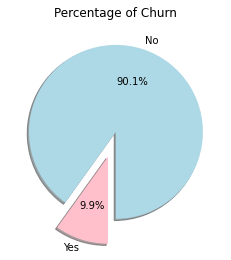

In [85]:
sizes = churne['churn'].value_counts(sort=True)
colors = ['lightblue','pink']

# retrieve list of unique value from a dataframe
labels = churne.result.unique()
explode = (0,0.3)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn')
plt.show()

##### From the Pie Chart Above, there is about 10% of customer churn rate

### SME activity 
##### 1. Show activity Distribution of the company

In [86]:
activity = combine[['id','activity_new','churn']]
# count 每个activity导致churn留否的数量,根据没有走的人数来sort descending order
activity = activity.groupby(['activity_new','churn']).size().unstack(level=1).sort_values(by=[0],ascending=False)
# 方法二: activity.groupby([activity['activity_new'],activity['churn']])['id'].count().unstack(level=1).sort_values(by=[0],ascending=False)
activity

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,17802.0,1116.0
kkklcdamwfafdcfwofuscwfwadblfmce,4608.0,455.0
kwuslieomapmswolewpobpplkaooaaew,2391.0,359.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,2244.0,384.0
ckfxocssowaeipxueikxcmaxdmcduxsa,2111.0,156.0
...,...,...
opoiuuwdmxdssidluooopfswlkkkcsxf,NaN,12.0
pfcocskbxlmofswiflsbcefcpufbopuo,NaN,24.0
wceaopxmdpccxfmcdpopulcaubcxibuw,NaN,11.0


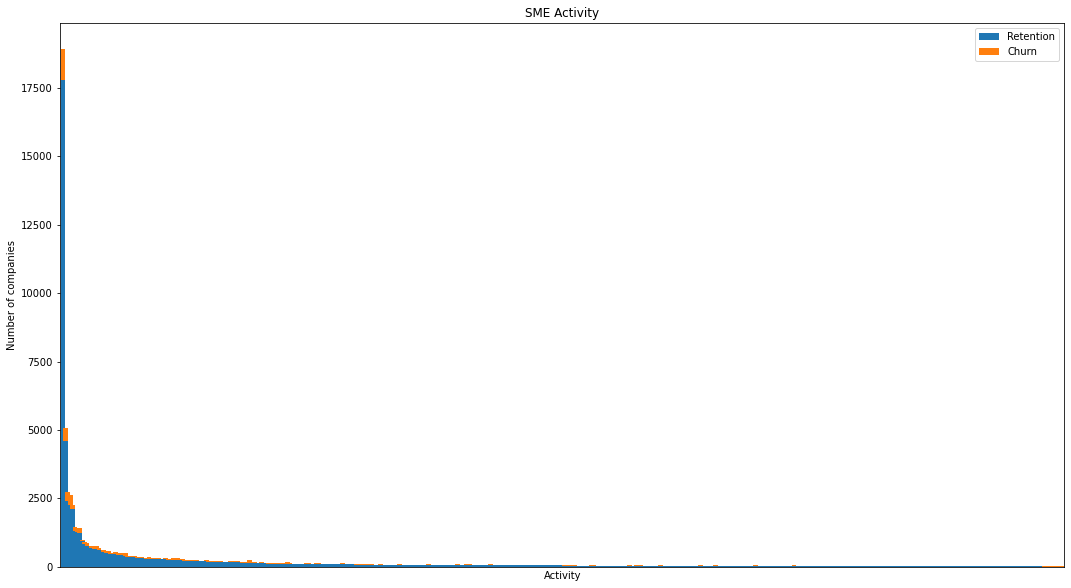

In [87]:
activity.plot(kind='bar',figsize = (18,10),width =2,stacked=True, title="SME Activity")
plt.ylabel("Number of companies")
plt.xlabel("Activity")
plt.legend(['Retention','Churn'], loc="upper right")
# remove x-axis labels for each bar
plt.xticks([])
plt.show()

In [88]:
# Find churn percentage in table
activity = activity.fillna(0)
activity['total'] = activity[0]+activity[1]
activity['percentage churn'] = activity[1]/activity['total']*100

In [89]:
activity.sort_values(by='percentage churn', ascending = False).head(20)

churn,0,1,total,percentage churn
activity_new,,,,
xwkaesbkfsacseixxksofpddwfkbobki,0.0,12.0,12.0,100.000000
wkwdccuiboaeaalcaawlwmldiwmpewma,0.0,12.0,12.0,100.000000
ikiucmkuisupefxcxfxxulkpwssppfuo,0.0,12.0,12.0,100.000000
opoiuuwdmxdssidluooopfswlkkkcsxf,0.0,12.0,12.0,100.000000
pfcocskbxlmofswiflsbcefcpufbopuo,0.0,24.0,24.0,100.000000
oeacexidmflusdkwuuicmpiaklkxulxm,0.0,12.0,12.0,100.000000
wceaopxmdpccxfmcdpopulcaubcxibuw,0.0,11.0,11.0,100.000000
kmlwkmxoocpieebifumobckeafmidpxf,0.0,12.0,12.0,100.000000
cwouwoubfifoafkxifokoidcuoamebea,12.0,24.0,36.0,66.666667


In [90]:
sum(activity['total'])

78570.0

##### 2. Results from SME activity:
###### From the graph and the table, we can tell that there is total of 78570 companies, and the activities with high percentage of churn rate only affect very few companies. 

### Sales Channel


In [91]:
channel = combine[['id','channel_sales','churn']]
print(len(pd.unique(channel['channel_sales'])))
# 只有8个sales channels
channel.head()

8


,id,channel_sales,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,0
1,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,0
2,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,0
3,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,0
4,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,0


In [92]:
channel = channel.groupby(['channel_sales','churn']).size().unstack(level=1).sort_values(by=[0],ascending=False)
channel = channel.fillna(0)
channel['total'] = channel[0]+channel[1]
channel['percentage_churn'] = channel[1]/channel['total']*100
channel['percentage_retention'] = 100-channel['percentage_churn']
channel.sort_values(by='percentage_churn', ascending = False).head()

churn,0,1,total,percentage_churn,percentage_retention
channel_sales,,,,,
foosdfpfkusacimwkcsosbicdxkicaua,77389.0,11041.0,88430.0,12.485582,87.514418
usilxuppasemubllopkaafesmlibmsdf,15516.0,1798.0,17314.0,10.384660,89.615340
ewpakwlliwisiwduibdlfmalxowmwpci,10604.0,983.0,11587.0,8.483645,91.516355
lmkebamcaaclubfxadlmueccxoimlema,23471.0,1390.0,24861.0,5.591086,94.408914
sddiedcslfslkckwlfkdpoeeailfpeds,143.0,0.0,143.0,0.000000,100.000000


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'foosdfpfkusacimwkcsosbicdxkicaua'),
  Text(1, 0, 'usilxuppasemubllopkaafesmlibmsdf'),
  Text(2, 0, 'ewpakwlliwisiwduibdlfmalxowmwpci'),
  Text(3, 0, 'lmkebamcaaclubfxadlmueccxoimlema'),
  Text(4, 0, 'sddiedcslfslkckwlfkdpoeeailfpeds'),
  Text(5, 0, 'epumfxlbckeskwekxbiuasklxalciiuu'),
  Text(6, 0, 'fixdbufsefwooaasfcxdxadsiekoceaa')])

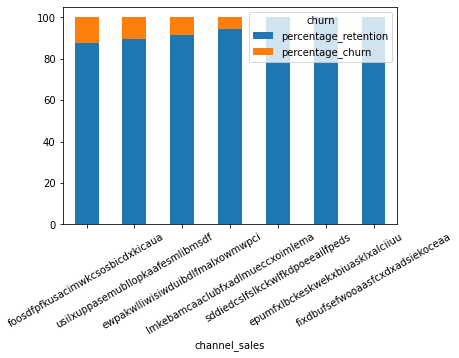

In [93]:
axis = channel[["percentage_retention",'percentage_churn']].sort_values(by='percentage_churn', ascending = False).plot(kind='bar',stacked=True)
plt.xticks(rotation = 30)


### Consumption
Let's see the distribution of the consumption over the last year and last month

In [94]:
consumption = combine[["id", "cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,831.8,f,0
1,48ada52261e7cf58715202705a0451c9,309275,0,10025,831.8,f,0
2,48ada52261e7cf58715202705a0451c9,309275,0,10025,831.8,f,0
3,48ada52261e7cf58715202705a0451c9,309275,0,10025,831.8,f,0
4,48ada52261e7cf58715202705a0451c9,309275,0,10025,831.8,f,0


In [95]:
def plot_distribution(dataframe, column):
    temp = pd.DataFrame({"Retention":dataframe[dataframe["churn"]==0][column],
                        "Churn": dataframe[dataframe["churn"]==1][column]})
    temp[["Retention", "Churn"]].plot(kind="hist", bins=50, figsize = (30,10), stacked = True)
    plt.xlabel(column)
    plt.ticklabel_format(style="plain", axis = "x")

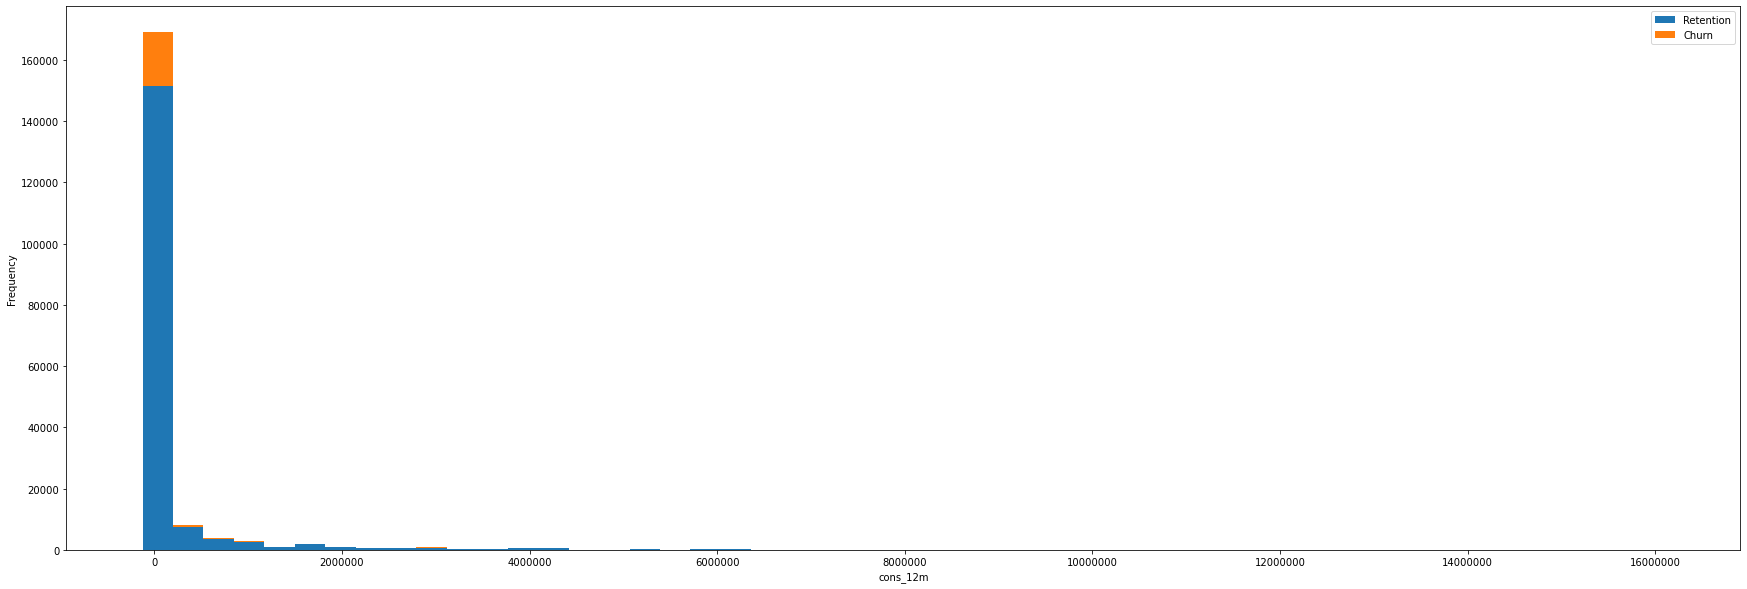

In [96]:
# fig,ax = plt.subplot(figsize = (18,25))
plot_distribution(consumption, "cons_12m")

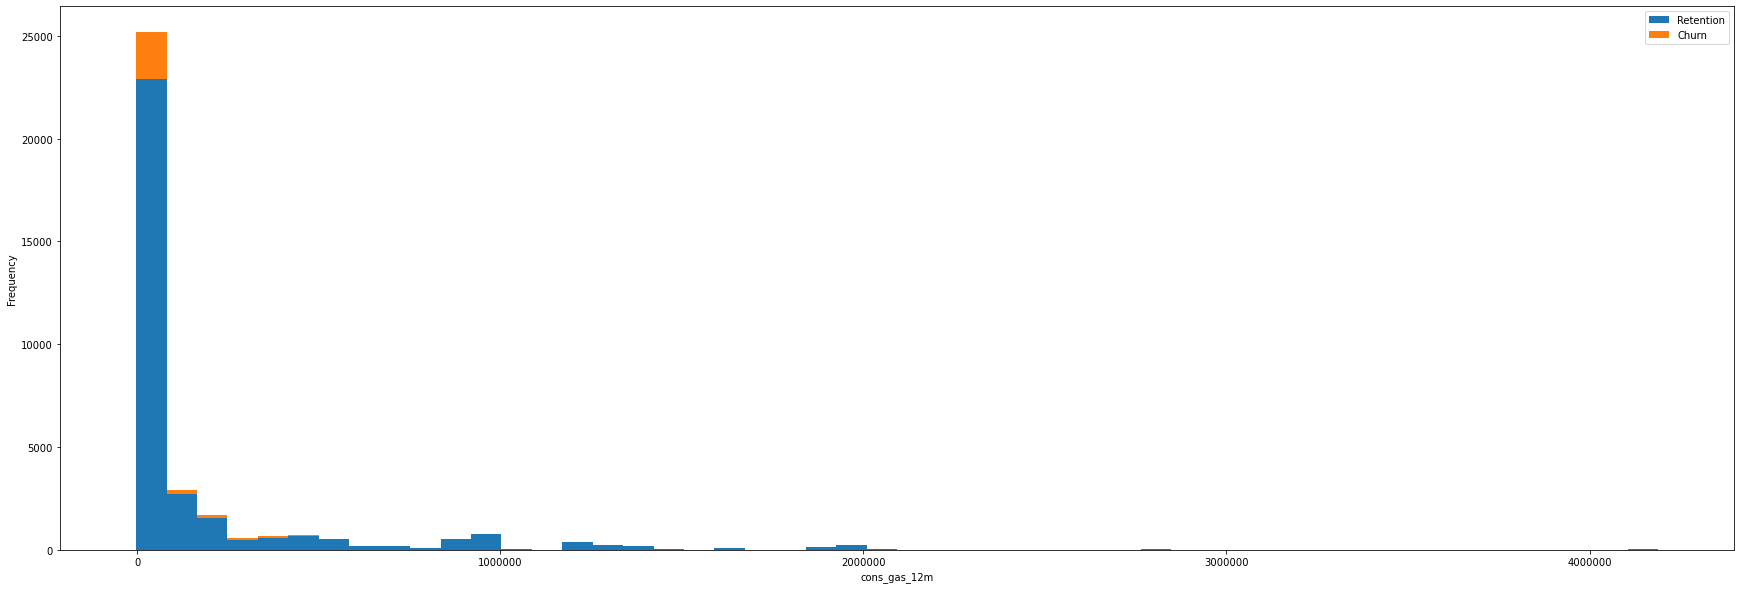

In [97]:
has_gas = consumption[consumption["has_gas"]=="t"]
plot_distribution(has_gas, "cons_gas_12m")

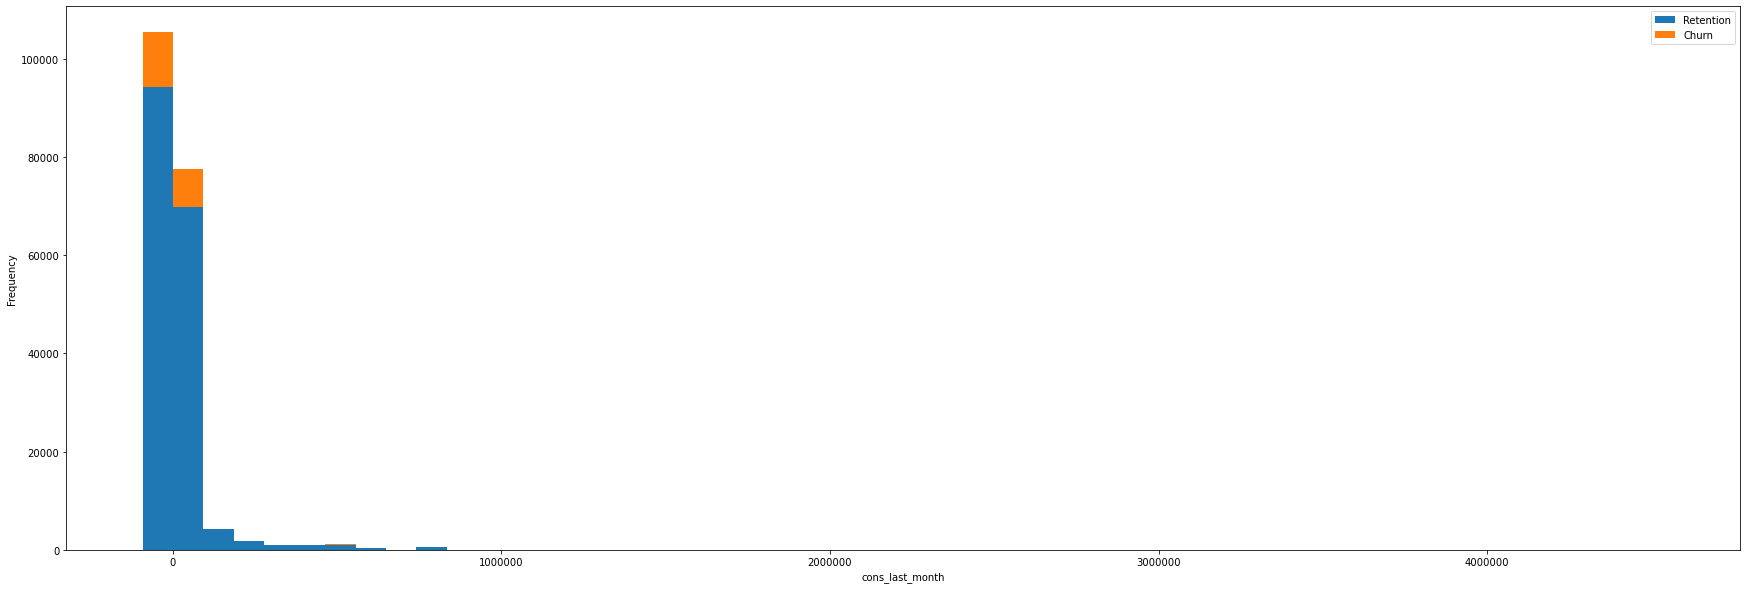

In [98]:
plot_distribution(consumption, "cons_last_month")

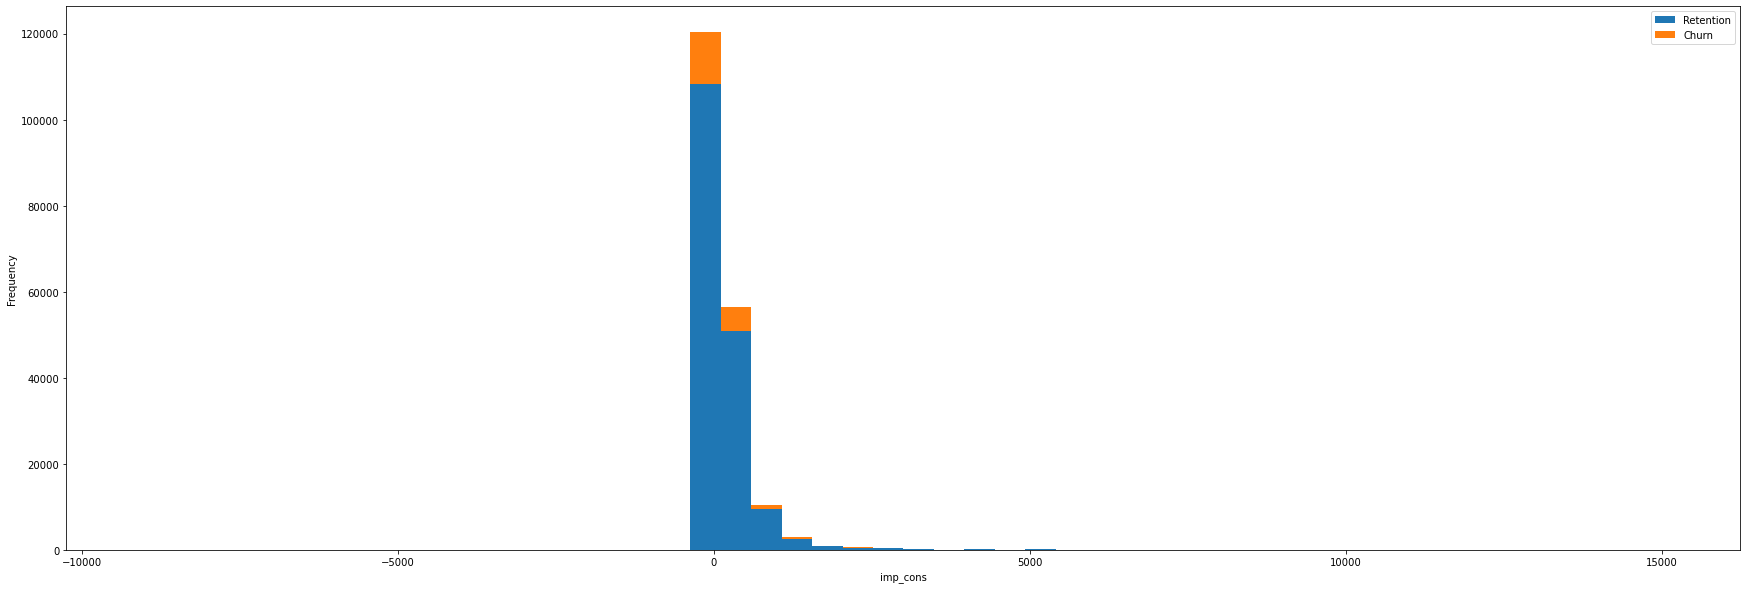

In [99]:
plot_distribution(consumption, "imp_cons")

### Conclusion from Consumption Historgram 
- The consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the distribution
- Which means this distribution are likely to be outliers. We can use a standard plot to visualize the outliers in more detail. -- Boxplot. (minimum, Q1, median, Q3, maximum). 
- Boxplot can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped, and if and how our data is skewed

C:\Users\ACI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACI\anaconda3\lib\site-packa

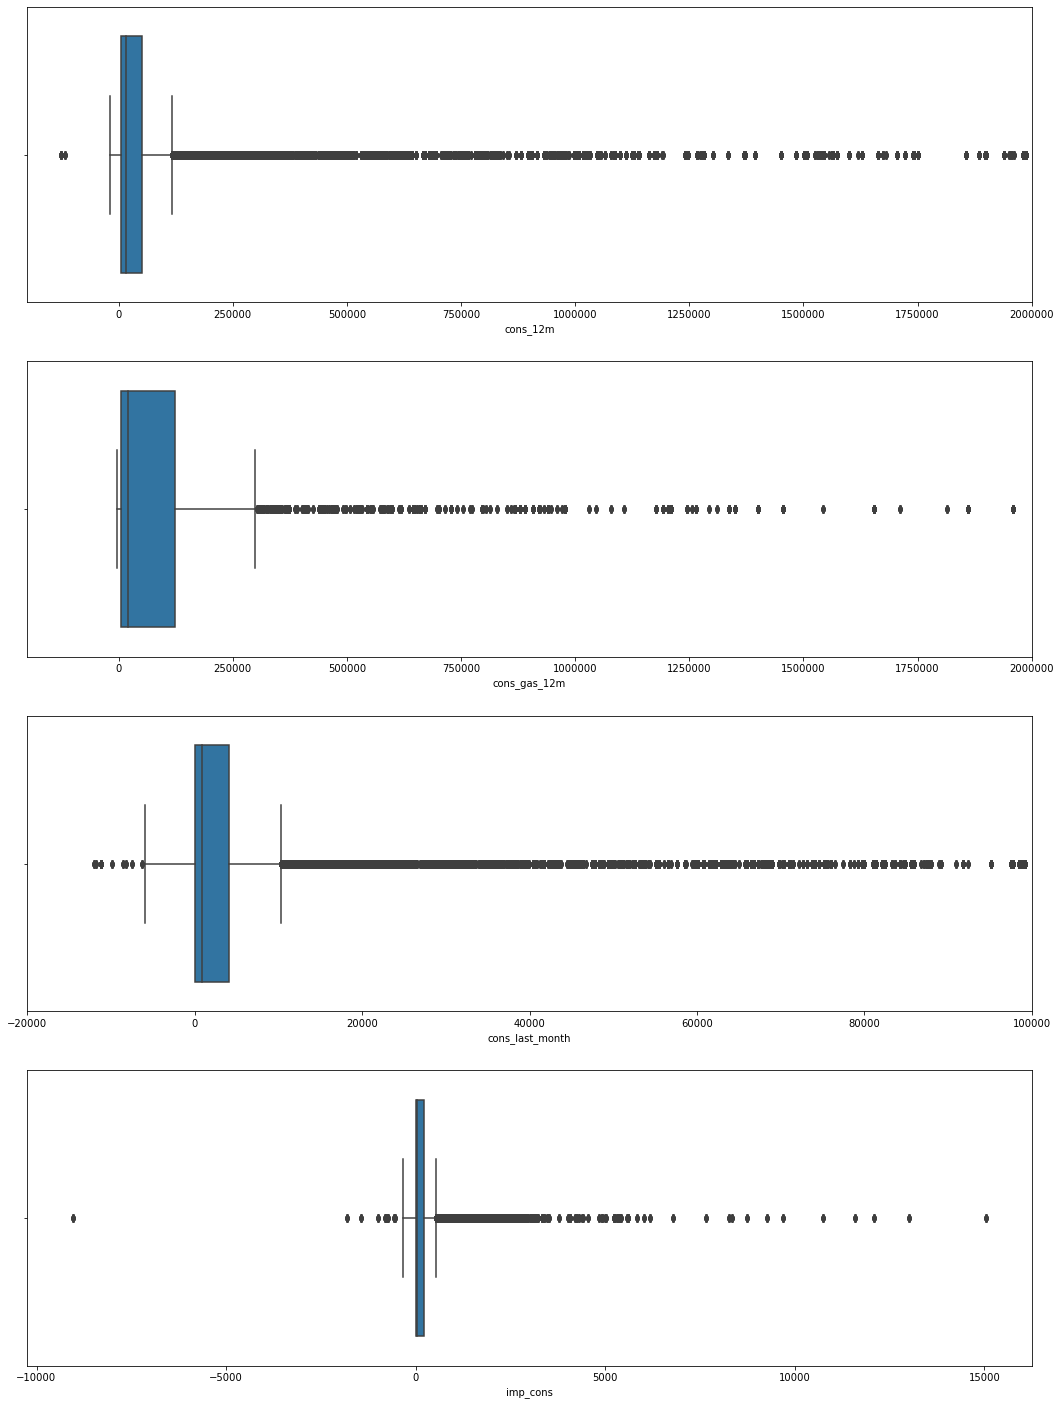

In [100]:
fig, axs = plt.subplots(nrows = 4, figsize = (18,25))
# plot boxplot
sns.boxplot(consumption["cons_12m"], ax = axs[0])
sns.boxplot(has_gas["cons_gas_12m"], ax = axs[1])
sns.boxplot(consumption["cons_last_month"], ax = axs[2])
sns.boxplot(consumption["imp_cons"], ax = axs[3])
# remove scientific notation
for ax in axs:
    ax.ticklabel_format(style="plain", axis = "x")
# set x-axis limit
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)
plt.show()

### Conclusion from Boxplot
- It is very clear now that we have a highly skewed distribution, and several outliers
- We will deal with the skewness and outliers in the next exercise (Data Cleaning)

## Dates handling 
- 客户去留分析一般会随着时间增加churn rate增加，active users会减少，且取决于产品周期

In [101]:
dates = combine[["id", "date_activ", "date_end", "date_modif_prod", "date_renewal", "churn"]].copy()
dates.head()

,id,date_activ,date_end,date_modif_prod,date_renewal,churn
0,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
1,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
2,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
3,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
4,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0


#### Transform date columns to datetime type 

In [102]:
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format="%Y-%m-%d")
dates["date_end"] = pd.to_datetime(dates["date_end"], format="%Y-%m-%d")
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format="%Y-%m-%d")
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format="%Y-%m-%d")
dates.head()

,id,date_activ,date_end,date_modif_prod,date_renewal,churn
0,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
1,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
2,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
3,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
4,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0


##### How to group dataframe by month
- select the column want to use with groupby and set as index
    - dates.index = dates["date_activ"] 
- then df.groupby([pd.Grouper(freq="M")]).count() or .sum() 这里的M就是month
    - dates.groupby([pd.Grouper(freq="M")]).count()

In [103]:
def plot_dates(dataframe, column, fontsize_=12):
    # group by month
    # 这个unstack(level = 1)是把dataframe swap： index变成column，column变成index
    temp = dataframe[[column,"churn", "id"]].set_index(column).groupby([pd.Grouper(freq="M"), "churn"]).count().unstack(level=1)
    # plot
    ax = temp.plot(kind="bar", stacked = True, figsize = (18,10), rot=0)
    # change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    
    plt.xticks(fontsize = fontsize_) # change label size
    plt.ylabel("Number of companies")
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()
def line_format(label):
    """
    convert time label to the format of pandas line plot
    """
    month = label.month_name()[:1] # [:1]就只出月的第一个字母January -> J; [:3] Jan
    if label.month_name()=="January":
        month+=f"\n{label.year}"
#     print(month)
    return month

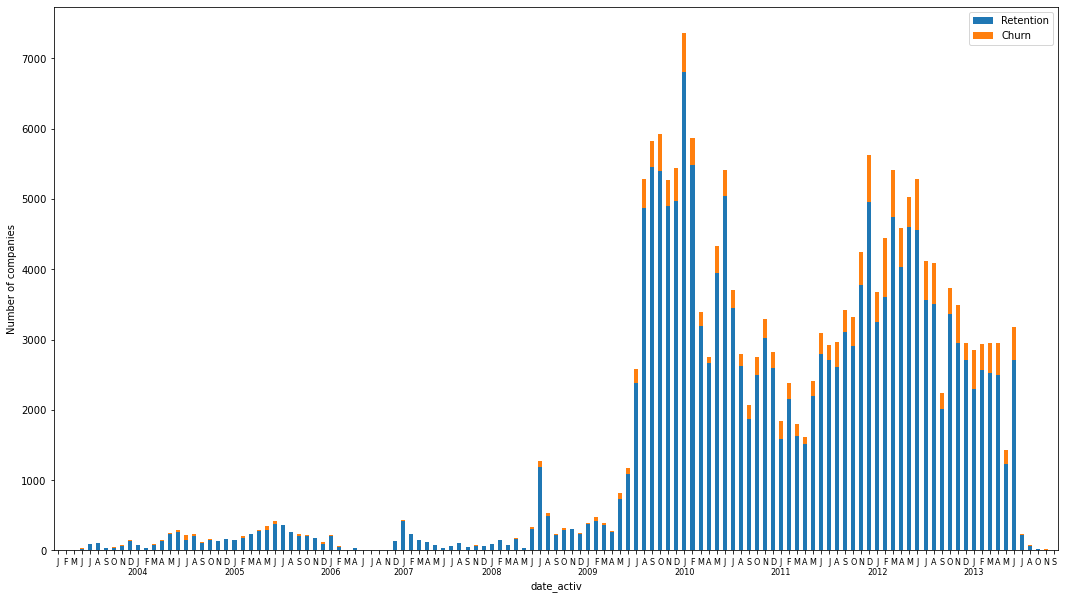

In [104]:
plot_dates(dates,"date_activ", fontsize_=8)

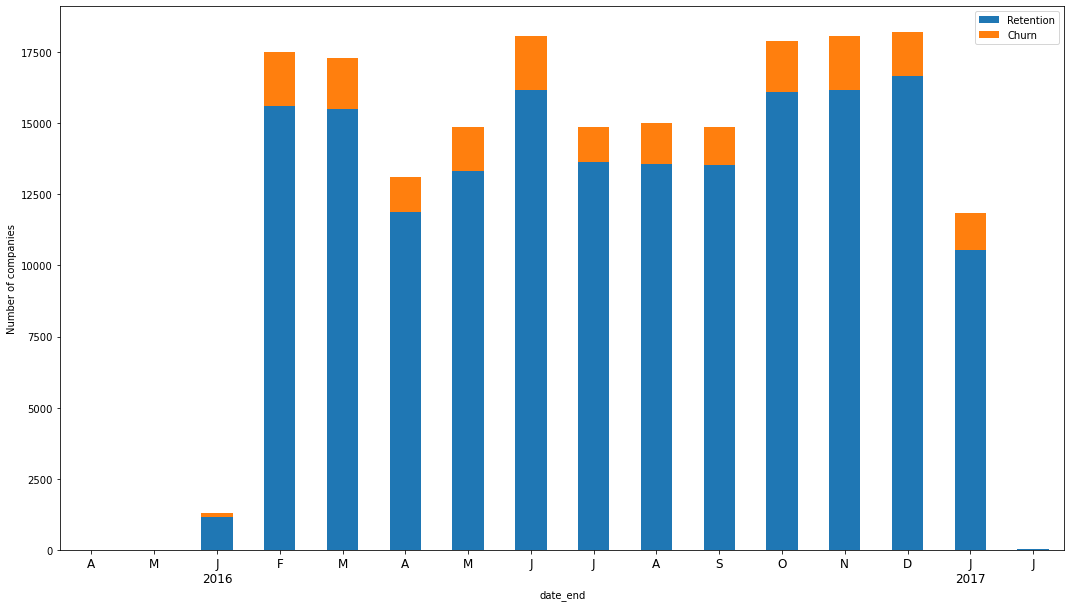

In [105]:
plot_dates(dates,"date_end")

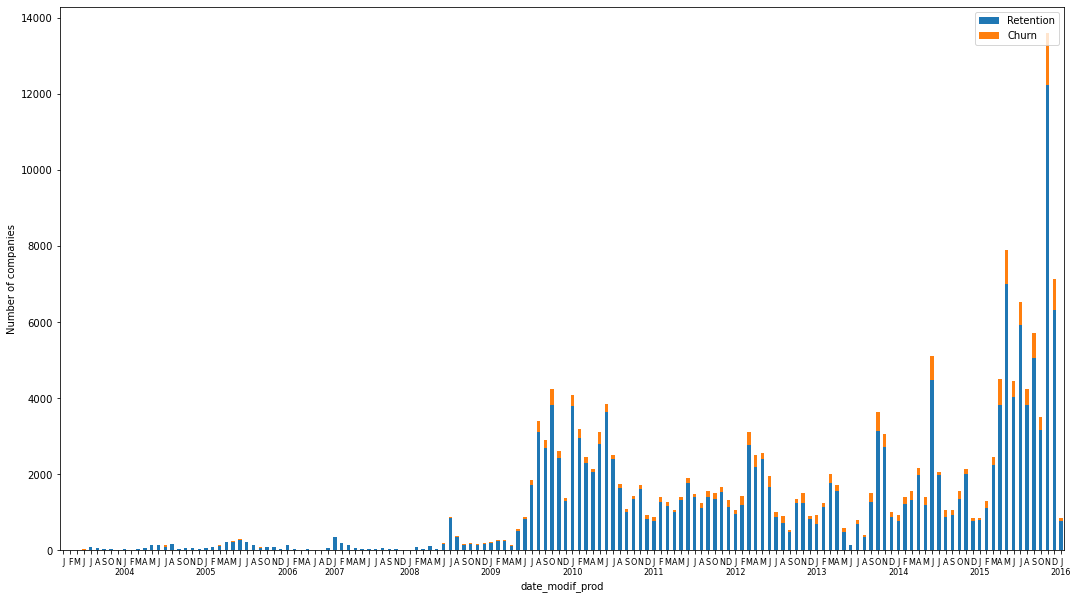

In [106]:
plot_dates(dates,"date_modif_prod", fontsize_=8)

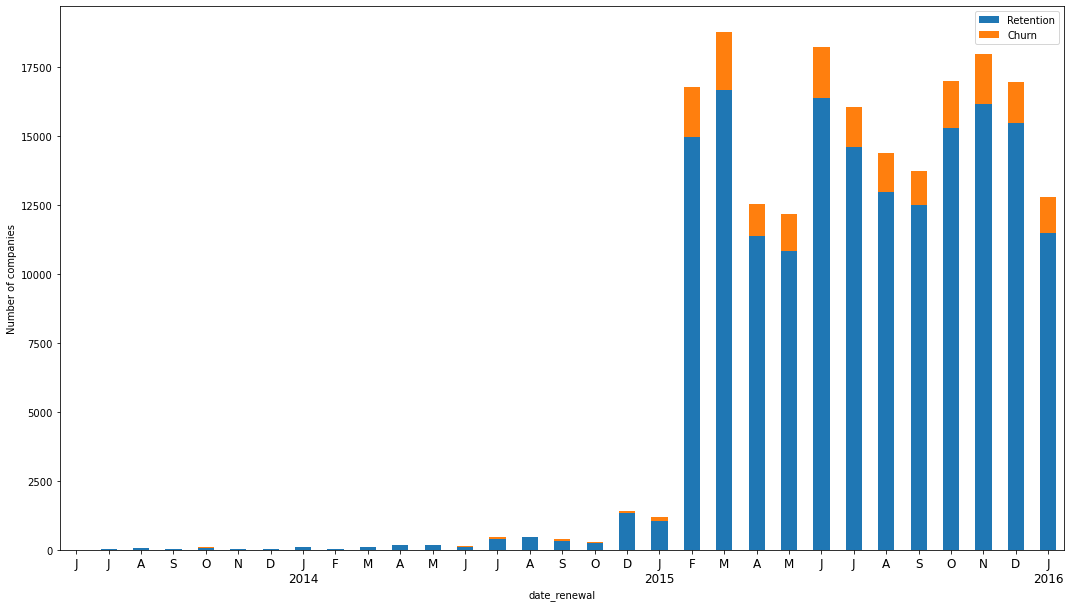

In [107]:
plot_dates(dates,"date_renewal")

### Conclusion from Dates plots
- Since we not sure who are the new users and old users, these visualization cannot provide us any useful insight. We will create a new feature using the raw dates provided in the next exercise. 

### Forecast features 

In [108]:
forecast = combine[["id", "forecast_base_bill_ele", "forecast_base_bill_year", "forecast_bill_12m", 
                   "forecast_cons", "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy",
                   "forecast_meter_rent_12m", "forecast_price_energy_p1", "forecast_price_energy_p2",
                   "forecast_price_pow_p1", "churn"]]
forecast.head()

,id,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,churn
0,48ada52261e7cf58715202705a0451c9,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,0
1,48ada52261e7cf58715202705a0451c9,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,0
2,48ada52261e7cf58715202705a0451c9,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,0
3,48ada52261e7cf58715202705a0451c9,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,0
4,48ada52261e7cf58715202705a0451c9,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,0


In [109]:
# check number of missing values in each column
forecast.isna().sum()

id                               0
forecast_base_bill_ele      150960
forecast_base_bill_year     150960
forecast_bill_12m           150960
forecast_cons               150960
forecast_cons_12m                0
forecast_cons_year               0
forecast_discount_energy      1507
forecast_meter_rent_12m          0
forecast_price_energy_p1      1507
forecast_price_energy_p2      1507
forecast_price_pow_p1         1507
churn                            0
dtype: int64

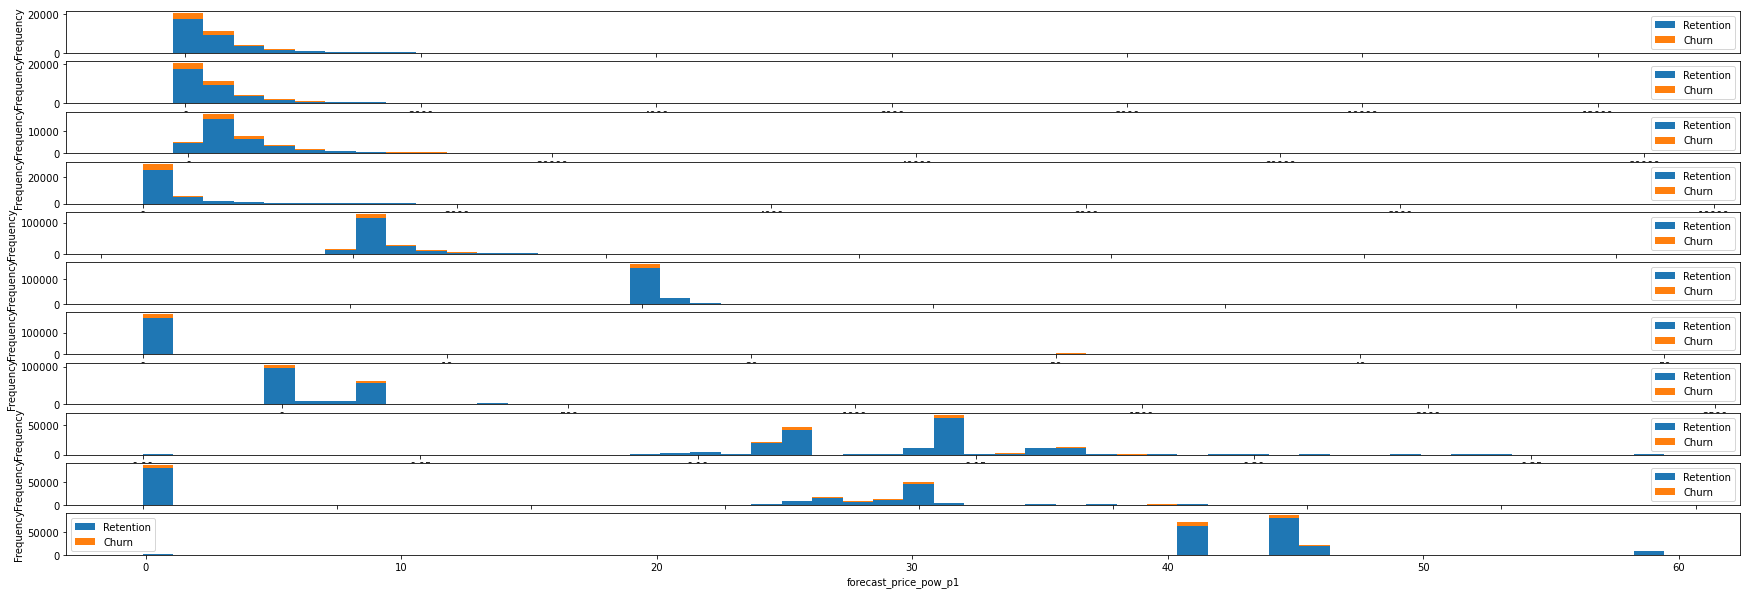

In [110]:
def plot_distribution(dataframe, column, axs):
    temp = pd.DataFrame({"Retention":dataframe[dataframe["churn"]==0][column],
                        "Churn": dataframe[dataframe["churn"]==1][column]})
    temp[["Retention", "Churn"]].plot(kind="hist", bins=50, ax=axs,figsize = (30,10), stacked = True)
    plt.xlabel(column)
    plt.ticklabel_format(style="plain", axis = "x")
fig,axs=plt.subplots(nrows=11, figsize=(18,25))
plot_distribution(forecast,"forecast_base_bill_ele", axs[0])
plot_distribution(forecast,"forecast_base_bill_year", axs[1])
plot_distribution(forecast,"forecast_bill_12m", axs[2])
plot_distribution(forecast,"forecast_cons", axs[3])
plot_distribution(forecast,"forecast_cons_12m", axs[4])
plot_distribution(forecast,"forecast_cons_year", axs[5])
plot_distribution(forecast,"forecast_discount_energy", axs[6])
plot_distribution(forecast,"forecast_meter_rent_12m", axs[7])
plot_distribution(forecast,"forecast_price_energy_p1", axs[8])
plot_distribution(forecast,"forecast_price_energy_p2", axs[9])
plot_distribution(forecast,"forecast_price_pow_p1", axs[10])

### Conclusion for Forecast features:
- similarly to the consumption plots, we can observe that a lot of the variables are highly skewed to the fith, creating a very long tail on the higher values

### Contract Type (electricity, gas) 

In [111]:
contract_type = combine[["id", "has_gas", "churn"]]
contract_type.head()
# has_gas column: f=electricity, t=gas

,id,has_gas,churn
0,48ada52261e7cf58715202705a0451c9,f,0
1,48ada52261e7cf58715202705a0451c9,f,0
2,48ada52261e7cf58715202705a0451c9,f,0
3,48ada52261e7cf58715202705a0451c9,f,0
4,48ada52261e7cf58715202705a0451c9,f,0


In [112]:
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack()
contract

has_gas,f,t
churn,,
0,141165,32728
1,16301,2808


In [113]:
contract["f_percent"] = (contract['f']/contract["f"].sum())*100
contract["t_percent"] = (contract['t']/contract["t"].sum())*100
contract = contract[["t_percent","f_percent"]]
contract

has_gas,t_percent,f_percent
churn,,
0,92.098154,89.647924
1,7.901846,10.352076


In [114]:
c = contract.transpose()
c

churn,0,1
has_gas,,
t_percent,92.098154,7.901846
f_percent,89.647924,10.352076


In [115]:
def plot_stacked_bar(dataframe, title_, size_=(18,10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(kind="bar", stacked = True, figsize = size_, rot = rot_, title = title_)
    annotate_stacked_bars(ax, textsize = 14)
    plt.legend(['Retention', 'Churn'],loc =legend_)
    plt.show()
def annotate_stacked_bars(ax, pad=0.99, colour = "white", textsize = 13):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == "0.0":
            continue
        ax.annotate(value, ((p.get_x()+p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad), color = colour, size = textsize,)

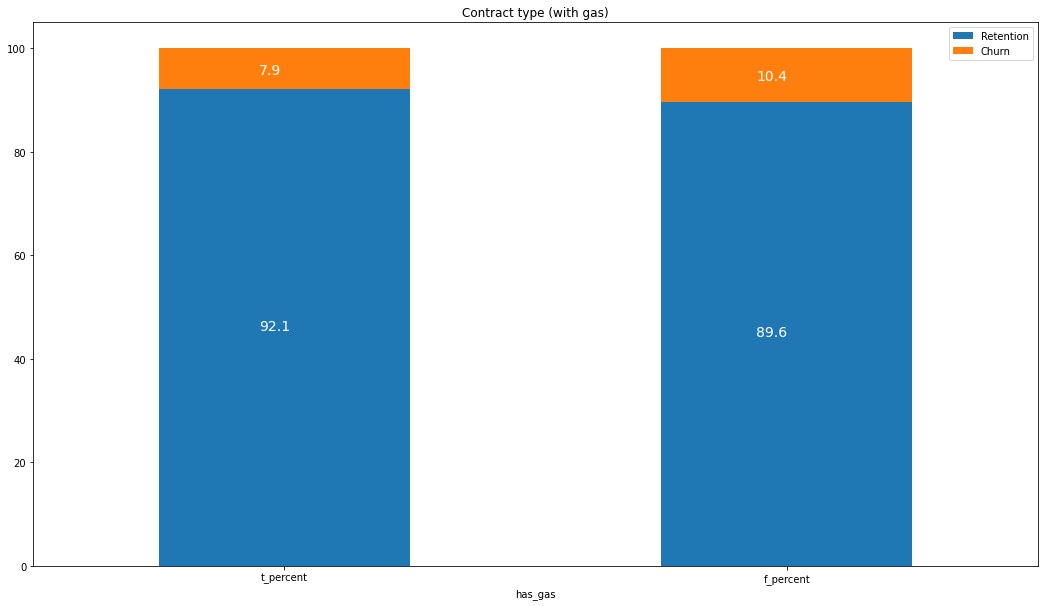

In [116]:
plot_stacked_bar(c, "Contract type (with gas)")

### Margins features 

In [117]:
margin = combine[["id", "margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]
margin.describe()

,margin_gross_pow_ele,margin_net_pow_ele,net_margin
count,192846.000000,192846.000000,192822.000000
mean,22.464032,21.463430,217.965424
std,23.701348,27.919116,366.815548
min,-525.540000,-615.660000,-4148.990000
25%,11.970000,11.950000,51.970000
50%,21.090000,20.970000,119.670000
75%,29.640000,29.640000,275.750000
max,374.640000,374.640000,24570.650000


C:\Users\ACI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


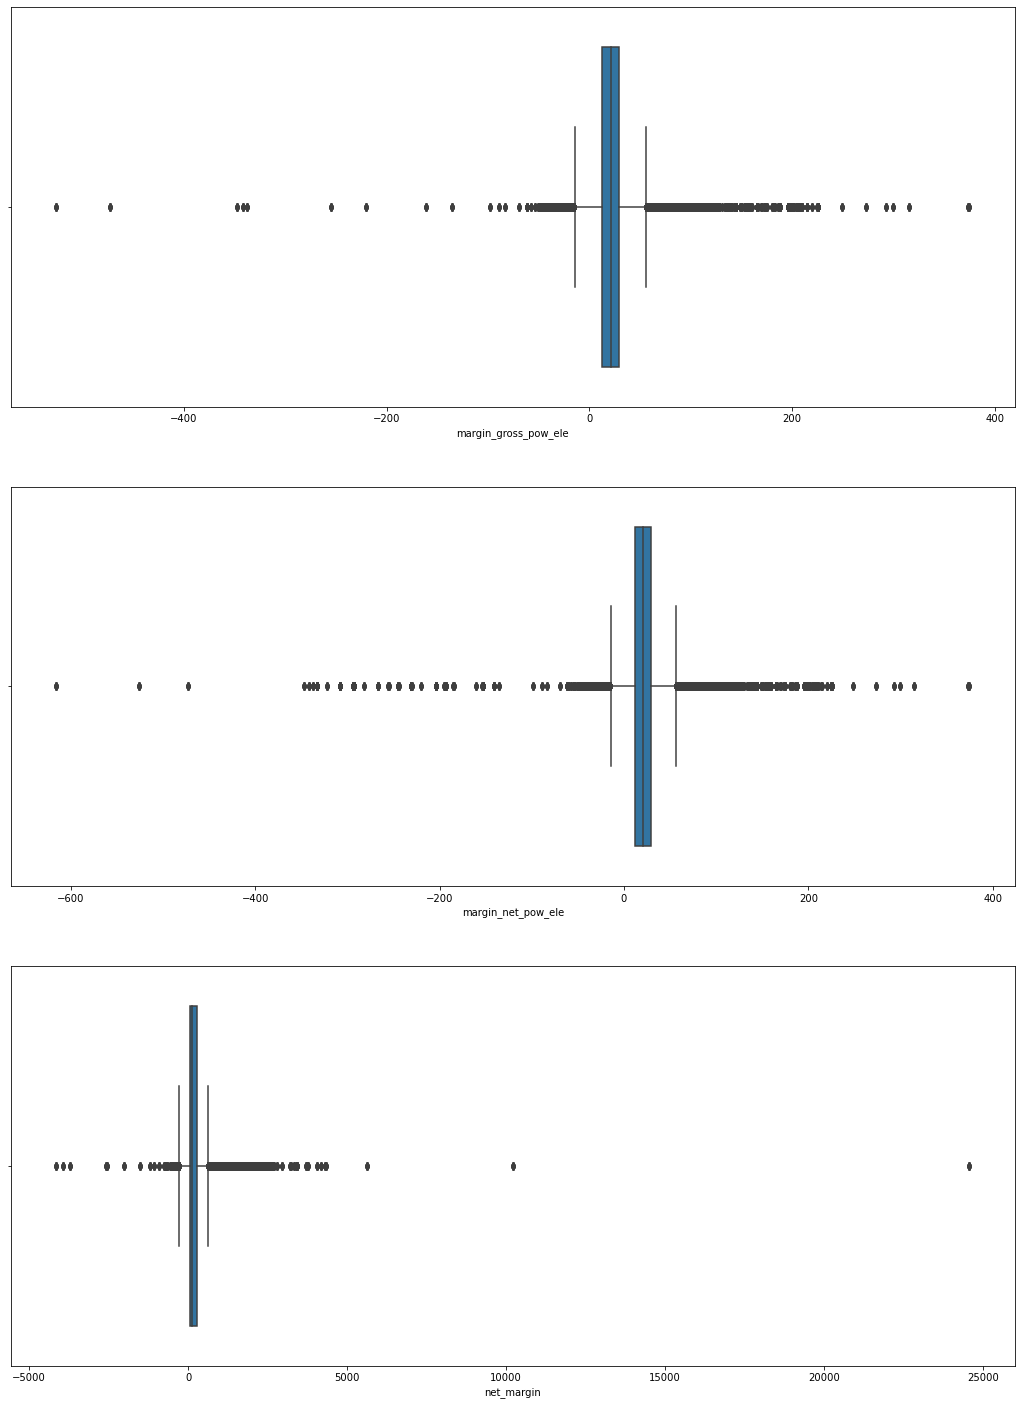

In [118]:
fig, axs = plt.subplots(nrows=3, figsize = (18,25))
sns.boxplot(margin["margin_gross_pow_ele"], ax = axs[0])
sns.boxplot(margin["margin_net_pow_ele"], ax = axs[1])
sns.boxplot(margin["net_margin"], ax = axs[2])
# remove scientific notation
axs[0].ticklabel_format(style="plain", axis = "x")
axs[1].ticklabel_format(style="plain", axis = "x")
axs[2].ticklabel_format(style="plain", axis = "x")
plt.show()
# we can visualize few outliers here as well

### Subscribed power 

In [119]:
power = combine[["id", "pow_max", "churn"]]
print(power.isna().sum())
power.describe()

id          0
pow_max    36
churn       0
dtype: int64


,pow_max,churn
count,192966.000000,193002.000000
mean,20.603921,0.099009
std,21.775187,0.298675
min,1.000000,0.000000
25%,12.500000,0.000000
50%,13.856000,0.000000
75%,19.800000,0.000000
max,500.000000,1.000000


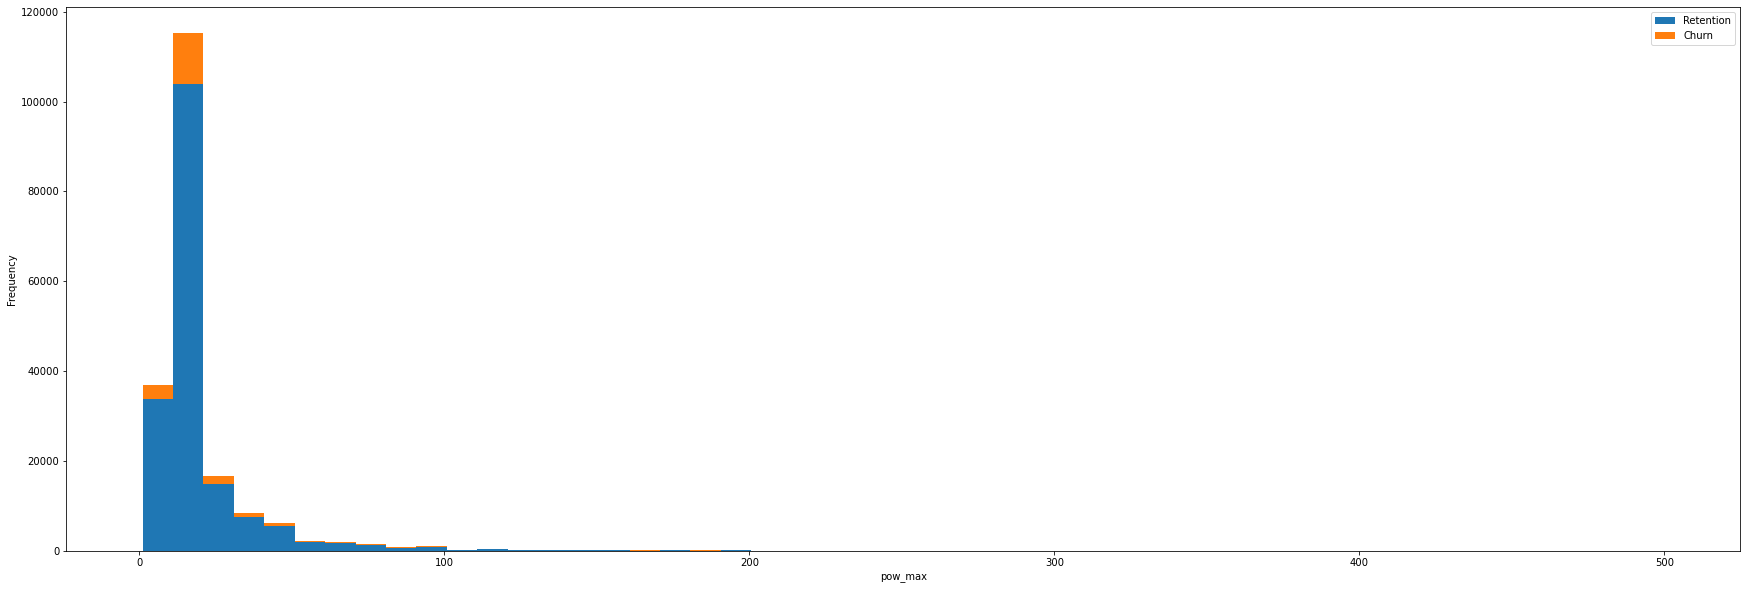

In [121]:
fig,axs = plt.subplots(nrows = 1,figsize=(18,10))
plot_distribution(power, "pow_max",axs)

### Others features 

In [122]:
others = combine[["id", "nb_prod_act", "num_years_antig", "origin_up","churn"]]
print(others.isna().sum())
print(others.describe())
others.head()

id                    0
nb_prod_act           0
num_years_antig       0
origin_up          1042
churn                 0
dtype: int64
         nb_prod_act  num_years_antig          churn
count  193002.000000    193002.000000  193002.000000
mean        1.347800         5.031134       0.099009
std         1.460228         1.676171       0.298675
min         1.000000         1.000000       0.000000
25%         1.000000         4.000000       0.000000
50%         1.000000         5.000000       0.000000
75%         1.000000         6.000000       0.000000
max        32.000000        16.000000       1.000000


,id,nb_prod_act,num_years_antig,origin_up,churn
0,48ada52261e7cf58715202705a0451c9,1,3,ldkssxwpmemidmecebumciepifcamkci,0
1,48ada52261e7cf58715202705a0451c9,1,3,ldkssxwpmemidmecebumciepifcamkci,0
2,48ada52261e7cf58715202705a0451c9,1,3,ldkssxwpmemidmecebumciepifcamkci,0
3,48ada52261e7cf58715202705a0451c9,1,3,ldkssxwpmemidmecebumciepifcamkci,0
4,48ada52261e7cf58715202705a0451c9,1,3,ldkssxwpmemidmecebumciepifcamkci,0


In [123]:
products = others.groupby([others["nb_prod_act"], others["churn"]])["id"].count().unstack(level=1)
products

churn,0,1
nb_prod_act,,
1,135112.0,15499.0
2,29738.0,2722.0
3,6059.0,672.0
4,1856.0,180.0
5,408.0,36.0
6,108.0,NaN
8,96.0,NaN
9,144.0,NaN
10,24.0,NaN


In [124]:
# calculate churn percentage by nb_prod_act
products_percentage = (products.div(products.sum(axis=1), axis = 0)*100).sort_values(by=[1], ascending=False)
products_percentage

churn,0,1
nb_prod_act,,
1,89.709251,10.290749
3,90.016342,9.983658
4,91.159136,8.840864
2,91.614295,8.385705
5,91.891892,8.108108
6,100.000000,NaN
8,100.000000,NaN
9,100.000000,NaN
10,100.000000,NaN


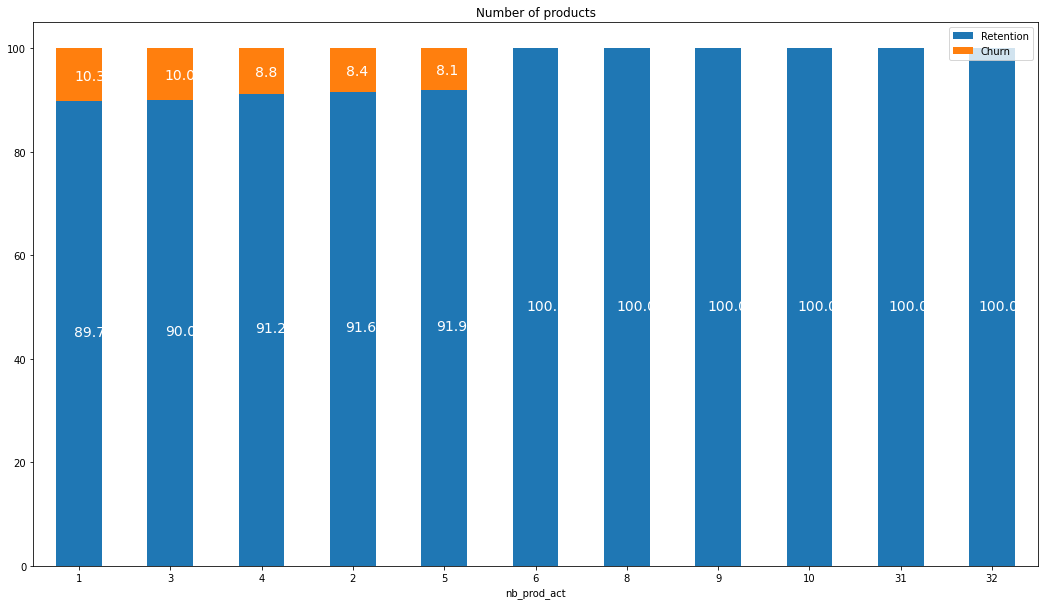

In [125]:
plot_stacked_bar(products_percentage,"Number of products")

In [126]:
years_antig = others.groupby([others["num_years_antig"], others["churn"]])["id"].count().unstack(level=1)
years_antig

churn,0,1
num_years_antig,,
1,12.0,NaN
2,96.0,36.0
3,28597.0,4445.0
4,45545.0,6371.0
5,27320.0,2599.0
6,56213.0,4411.0
7,7150.0,623.0
8,2278.0,144.0
9,1260.0,12.0


In [127]:
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis = 0)*100).sort_values(by=[1], ascending=False)
years_antig_percentage

churn,0,1
num_years_antig,,
2,72.727273,27.272727
3,86.547424,13.452576
4,87.728253,12.271747
12,88.976378,11.023622
5,91.313212,8.686788
7,91.985077,8.014923
13,92.307692,7.692308
6,92.724004,7.275996
11,92.794066,7.205934


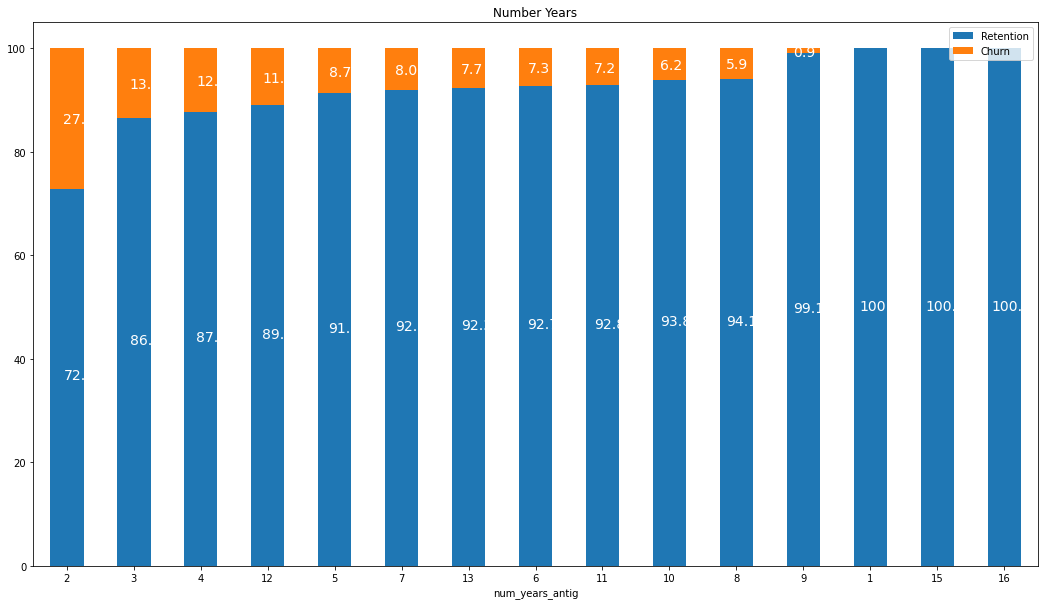

In [128]:
plot_stacked_bar(years_antig_percentage, "Number Years")

In [129]:
origin=others.groupby([others["origin_up"], others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
origin_percentage

churn,0,1
origin_up,,
ewxeelcelemmiwuafmddpobolfuxioce,100.000000,NaN
kamkkxfxxuwbdslkwifmmcsiusiuosws,94.135888,5.864112
ldkssxwpmemidmecebumciepifcamkci,91.411601,8.588399
lxidpiddsbxsbosboudacockeimpuepw,87.102895,12.897105
usapbepcfoloekilkwsdiboslwaxobdp,100.000000,NaN


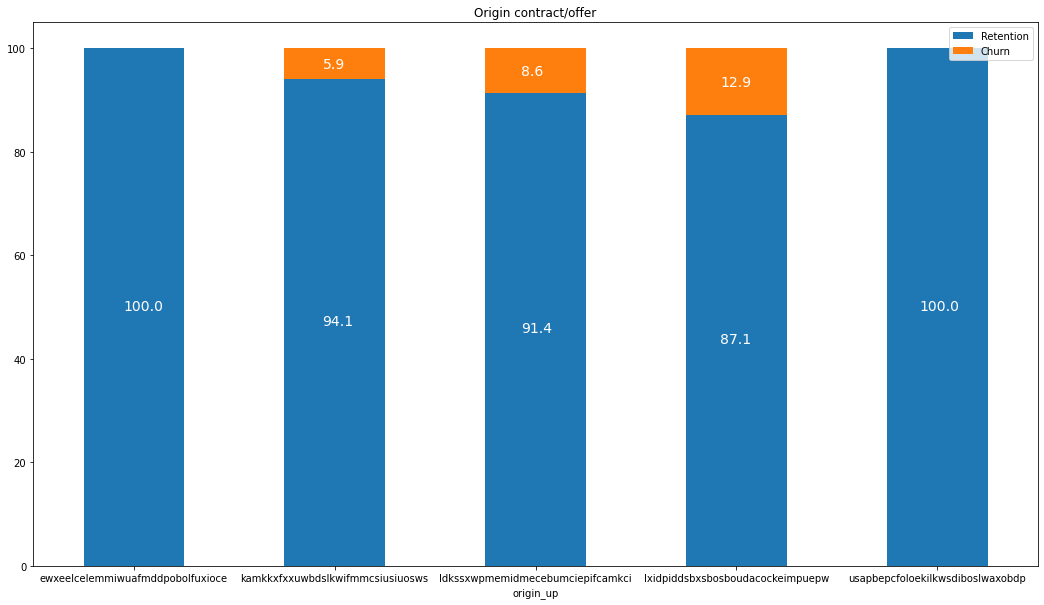

In [130]:
plot_stacked_bar(origin_percentage,"Origin contract/offer")

# Data Cleaning 

### Missing Values

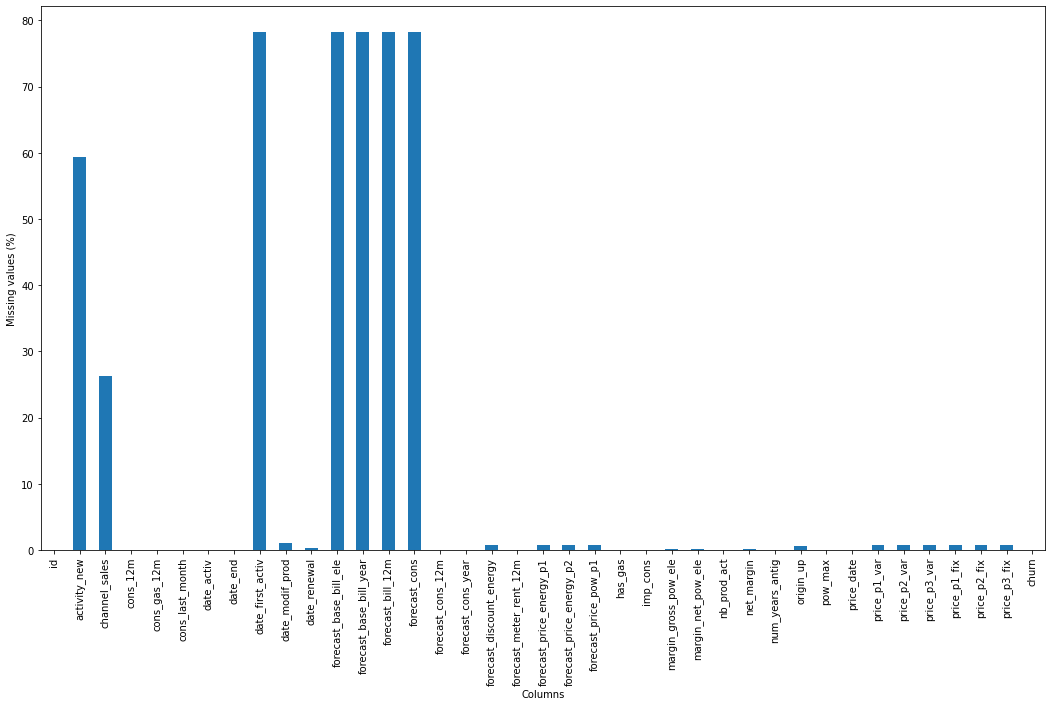

In [131]:
# plot missing data for df all columns
(combine.isnull().sum()/len(combine.index)*100).plot(kind="bar",figsize=(18,10))
plt.xlabel("Columns")
plt.ylabel("Missing values (%)")
plt.show()

In [132]:
 combine.drop(columns=["date_first_activ", "forecast_base_bill_year",
                       "forecast_base_bill_ele","forecast_bill_12m", "forecast_cons"], inplace=True)

In [133]:
pd.DataFrame({"Datafram columns":combine.columns})
# 因为price_p1_var ~ price_p3_fix来自history data，若remove了就基本没了，所以substitute missing values with the median

,Datafram columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


In [134]:
combine[combine[["price_p1_var","price_p2_var","price_p3_var","price_p1_fix","price_p2_fix","price_p3_fix"]].isnull().any(axis=1)]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
23,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN,1
32,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0
173,2c05848e1a577dd041ea6804bbf5bbf5,kkklcdamwfafdcfwofuscwfwadblfmce,foosdfpfkusacimwkcsosbicdxkicaua,46121,1542867,5280,2011-09-01,2016-10-30,2013-10-30,2015-11-01,...,lxidpiddsbxsbosboudacockeimpuepw,16.500,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,0
300,78014630fbac3e6aa980361d25cea748,NaN,usilxuppasemubllopkaafesmlibmsdf,20560,0,3804,2012-12-31,2016-12-31,2015-11-01,2016-01-01,...,lxidpiddsbxsbosboudacockeimpuepw,11.000,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0
315,050706fa01538720da274cbeb6e1f983,xwkaesbkfsacseixxksofpddwfkbobki,foosdfpfkusacimwkcsosbicdxkicaua,21097,0,0,2013-04-04,2016-04-04,2015-11-24,2015-04-05,...,lxidpiddsbxsbosboudacockeimpuepw,17.321,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192044,b1b88ad5337b366a8119f18df3653a86,ipiiicokaeexiaebwmkecbdummcdmccu,foosdfpfkusacimwkcsosbicdxkicaua,40586,0,0,2013-03-10,2016-06-04,2014-06-14,2015-06-23,...,lxidpiddsbxsbosboudacockeimpuepw,41.467,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN,0
192090,d77e823d24aa59beda5baa6bca37c903,NaN,NaN,3783,0,225,2010-01-01,2016-12-31,2010-01-01,2016-01-01,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,8.000,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0
192346,f6801c86377d1245947b37117551e1d8,NaN,foosdfpfkusacimwkcsosbicdxkicaua,69340,0,10929,2009-11-27,2016-11-27,2009-11-27,2015-11-29,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN,0
192681,ce6e4ca651a7a8b2af0d3f69bc47624e,wxemiwkumpibllwklfbcooafckufkdlm,foosdfpfkusacimwkcsosbicdxkicaua,9976,0,240,2012-12-19,2016-12-19,2012-12-19,2015-12-21,...,ldkssxwpmemidmecebumciepifcamkci,13.856,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,0


In [135]:
# replace missing value with Media
combine.loc[combine['price_p1_var'].isnull(),"price_p1_var"] = combine["price_p1_var"].median()
combine.loc[combine['price_p2_var'].isnull(),"price_p2_var"] = combine["price_p2_var"].median()
combine.loc[combine['price_p3_var'].isnull(),"price_p3_var"] = combine["price_p3_var"].median()
combine.loc[combine['price_p1_fix'].isnull(),"price_p1_fix"] = combine["price_p1_fix"].median()
combine.loc[combine['price_p2_fix'].isnull(),"price_p2_fix"] = combine["price_p2_fix"].median()
combine.loc[combine['price_p3_fix'].isnull(),"price_p3_fix"] = combine["price_p3_fix"].median()

### Duplicate values
- we want to make sure all the data we have is unique and we don't have any dupicated rows. for that, we are going to use the .duplicated() function in pandas.
- This will tell us if there are any duplicated rows

In [136]:
combine[combine.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn


In [137]:
combine["date_activ"] = pd.to_datetime(combine["date_activ"], format="%Y-%m-%d")
combine["date_end"] = pd.to_datetime(combine["date_end"], format="%Y-%m-%d")
combine["date_modif_prod"] = pd.to_datetime(combine["date_modif_prod"], format="%Y-%m-%d")
combine["date_renewal"] = pd.to_datetime(combine["date_renewal"], format="%Y-%m-%d")
combine["price_date"] = pd.to_datetime(combine["price_date"], format="%Y-%m-%d")
combine.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
1,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
2,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
3,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-04-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
4,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-05-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0


In [138]:
combine[["price_p1_var","price_p2_var","price_p3_var","price_p1_fix","price_p2_fix","price_p3_fix"]].describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [139]:
# price_p1_fix, price_p2_fix, price_p3_fix have negative values, print number of negative values
# in these 3 columns
print(combine.loc[combine['price_p1_fix']<0]["id"].count())
print(combine.loc[combine['price_p1_fix']<0]["id"].count()/combine['price_p1_fix'].count()*100)
print(combine.loc[combine['price_p2_fix']<0]["id"].count())
print(combine.loc[combine['price_p2_fix']<0]["id"].count()/combine['price_p2_fix'].count()*100)
print(combine.loc[combine['price_p3_fix']<0]["id"].count())
print(combine.loc[combine['price_p3_fix']<0]["id"].count()/combine['price_p3_fix'].count()*100)

10
0.005181293458098879
9
0.004663164112288992
9
0.004663164112288992


In [140]:
combine[(combine.price_p1_fix<0)|(combine.price_p2_fix<0)|(combine.price_p3_fix<0)]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
1072,d4a84ff4ec620151ef05bdef0cf27eab,NaN,NaN,16163,0,1474,2009-08-01,2016-08-01,2009-08-01,2015-08-02,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,20.700,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166,0
4571,395a6f41bbd1a0f23a64f00645264e78,dwamuluiuaiowuxmesuuilkbobidcmfo,foosdfpfkusacimwkcsosbicdxkicaua,58258,0,7376,2011-08-12,2016-07-10,2013-07-10,2015-07-12,...,lxidpiddsbxsbosboudacockeimpuepw,100.000,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166,0
21053,51d7d8a0bf6b8bd94f8c1de7942c66ea,cfeluxakapclbcismpfoefdmmplddekc,lmkebamcaaclubfxadlmueccxoimlema,64138,0,2105,2011-10-06,2016-10-05,2015-05-24,2015-10-09,...,lxidpiddsbxsbosboudacockeimpuepw,20.785,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172,0
49960,decc0a647016e183ded972595cd2b9fb,NaN,foosdfpfkusacimwkcsosbicdxkicaua,17915,0,1451,2012-02-03,2016-03-05,2015-03-10,2015-03-06,...,lxidpiddsbxsbosboudacockeimpuepw,15.400,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166,0
125700,951d99fe07ca94c2139f43bc37095139,NaN,NaN,96197,48220,9474,2010-05-27,2016-05-27,2013-12-19,2015-05-29,...,lxidpiddsbxsbosboudacockeimpuepw,50.000,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166,0
138091,2a4ed325054472e03cdcc9a34693be4b,NaN,foosdfpfkusacimwkcsosbicdxkicaua,28777,91010,4164,2012-01-10,2016-09-20,2015-09-20,2014-01-12,...,ldkssxwpmemidmecebumciepifcamkci,10.392,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000,0
146941,cc214d7c05de3ee17a7691e274ac488e,kwuslieomapmswolewpobpplkaooaaew,foosdfpfkusacimwkcsosbicdxkicaua,176365,0,17600,2011-12-01,2016-12-01,2013-09-16,2015-12-02,...,lxidpiddsbxsbosboudacockeimpuepw,80.000,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172,1
156460,cfd098ee6c567eb32374c77d20571bc7,ilkfsaapsxpkcpswbllddfmpamwelpxi,foosdfpfkusacimwkcsosbicdxkicaua,246148,0,21639,2012-05-01,2016-05-01,2013-11-05,2015-05-02,...,lxidpiddsbxsbosboudacockeimpuepw,63.000,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166,1
163545,f7bdc6fa1067cd26fd80bfb9f3fca28f,dwamuluiuaiowuxmesuuilkbobidcmfo,foosdfpfkusacimwkcsosbicdxkicaua,16068,0,2315,2012-04-01,2016-04-01,2015-05-24,2015-04-02,...,lxidpiddsbxsbosboudacockeimpuepw,55.000,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166,0
168748,9b523ad5ba8aa2e524dcda5b3d54dab2,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3203,24514,283,2012-07-03,2016-10-14,2015-10-08,2015-07-04,...,lxidpiddsbxsbosboudacockeimpuepw,10.392,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166,0


##### Conclusion for negative values:  
- there are about 10 values are negative. Because of the low amount of negative values, this is more likely to be due to corrupted data rather than a "price discount"
- replace the negative values with the median (or most frequent value)

In [141]:
combine.loc[combine['price_p1_fix']<0,"price_p1_fix"] = combine['price_p1_fix'].median()
combine.loc[combine['price_p2_fix']<0,"price_p2_fix"] = combine['price_p2_fix'].median()
combine.loc[combine['price_p3_fix']<0,"price_p3_fix"] = combine['price_p3_fix'].median()

# Feature Engineering
- since we have the consumption data for each of the companies for the year 2015, we will create new column using the average of the year to our model

In [142]:
mean_year = combine.groupby(['id']).mean().reset_index()
mean_year['price_p1_var']

0        0.124338
1        0.146426
2        0.181558
3        0.118757
4        0.147926
           ...   
16091    0.138863
16092    0.147137
16093    0.153879
16094    0.123858
16095    0.125360
Name: price_p1_var, Length: 16096, dtype: float64

In [143]:
mean_year = mean_year.rename(index=str, columns={
    "price_p1_var":"mean_year_price_p1_var",
    "price_p2_var":"mean_year_price_p2_var",
    "price_p3_var":"mean_year_price_p3_var",
    "price_p1_fix":"mean_year_price_p1_fix",
    "price_p2_fix":"mean_year_price_p2_fix",
    "price_p3_fix":"mean_year_price_p3_fix"
})
mean_year.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,net_margin,num_years_antig,pow_max,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,churn
0,0002203ffbb812588b632b9e628cc38d,22034,0,3084,729.06,425,0.0,138.95,0.116900,0.100015,...,81.42,6,17.250,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0
1,0004351ebdd665e6ee664792efc4fd13,4060,0,0,597.77,0,0.0,6.84,0.142065,0.000000,...,61.58,6,13.200,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,7440,0,1062,1311.16,1062,30.0,18.37,0.199230,0.000000,...,81.61,3,13.856,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0
3,0010ee3855fdea87602a5b7aba8e42de,4199490,728810,456462,11776.27,17393,0.0,132.11,0.110083,0.093746,...,897.08,6,33.000,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0
4,00114d74e963e47177db89bc70108537,11272,0,0,1671.41,0,0.0,18.27,0.144149,0.000000,...,157.99,6,13.200,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0


In [144]:
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"]+mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"]+mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"]+mean_year["mean_year_price_p3_fix"]
features = mean_year

#### Create a new variable tenure = date_end - date_activ

In [146]:
combine['tenure'] = ((combine['date_end'] - combine['date_activ'])/np.timedelta64(1,"Y"))

In [153]:
tenure = combine[['tenure', 'churn', 'id']]
tenure = tenure.dropna(0)
tenure['tenure'] = tenure['tenure'].astype(int)
tenure.head()

,tenure,churn,id
0,3,0,48ada52261e7cf58715202705a0451c9
1,3,0,48ada52261e7cf58715202705a0451c9
2,3,0,48ada52261e7cf58715202705a0451c9
3,3,0,48ada52261e7cf58715202705a0451c9
4,3,0,48ada52261e7cf58715202705a0451c9


In [157]:
tenure = tenure.groupby(['tenure','churn'])['id'].count().unstack(level=1)
tenure.head()

KeyError: 'churn'

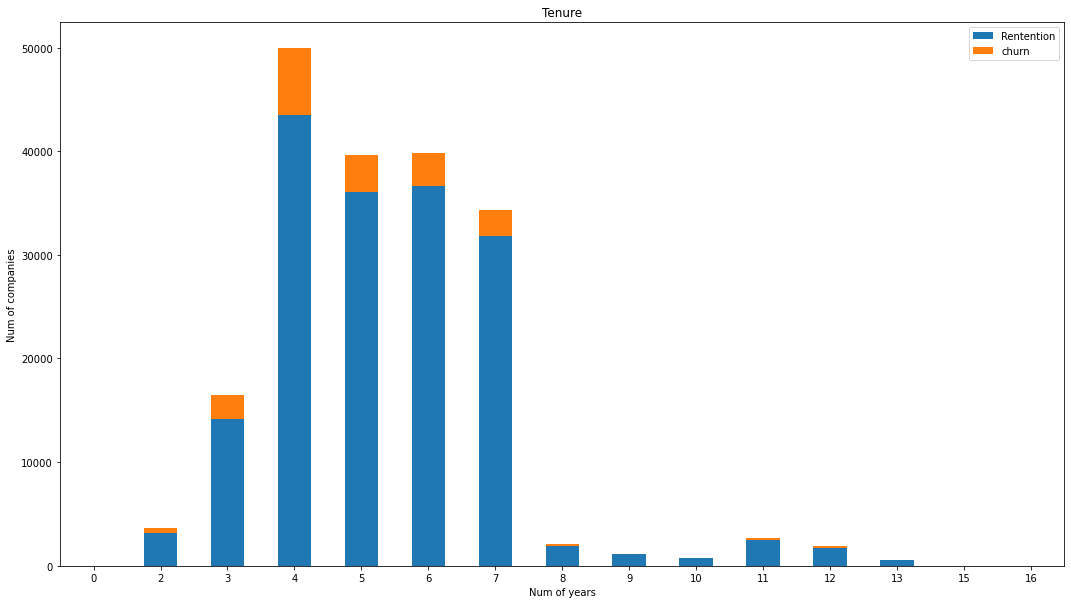

In [156]:
tenure.plot(kind="bar", figsize=(18,10), stacked=True, rot=0, title="Tenure")
plt.legend(["Rentention", "churn"],loc="upper right")
plt.ylabel("Num of companies")
plt.xlabel("Num of years")
plt.show()

#### Conclusion from years of contracts vs. churn rate:
- churn is very low for companies just joined recently or have been with us for a long time. But higher churn rate for 3-7 years of tenure. 
- Now we will break down to mongth 
- We have observed contract by years, now we will dig deeper and look at contract by months

#### Create Month Column:
1. According to the requirement, traning model should includes feature in Jan. 2016, so we use 2016-01-01 as reference date.
    - substract the reference date and the column date
2. convert the timedelta in months (dates difference)
3. conver to integer

In [163]:
def convert_month(reference_date, dataframe, column):
    time_delta = reference_date - dataframe[column]
    months = (time_delta/np.timedelta64(1,"M"))
    return months

In [178]:
reference_date = datetime.datetime(2016, 1,1)
combine["month_activ"] = convert_month(reference_date, combine, "date_activ")
combine["month_to_end"] = convert_month(reference_date, combine, "date_end")
combine["month_modif_prod"] = convert_month(reference_date, combine, "date_modif_prod")
combine["month_renewal"] = convert_month(reference_date, combine, "date_renewal")

In [179]:
combine = combine.dropna()
combine.isnull().sum()
combine["month_activ"]=combine["month_activ"].astype(int)
# 因为month_to_end是contract结束的时间，如果是2016-01-01开始，肯定比那个时间大所以是-reference date
combine["month_to_end"]=-combine["month_to_end"].astype(int)
combine["month_modif_prod"]=combine["month_modif_prod"].astype(int)
combine["month_renewal"] = combine["month_renewal"].astype(int)

In [180]:
def plot_churn_by_month(dataframe, column, fontsize_ = 11):
    temp = dataframe[[column,"churn","id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
    temp.plot(kind="bar", figsize = (18,10),
             stacked = True,
             rot=0,
             title = column)
    plt.legend(["Retention","Churn"],loc = "upper right")
    plt.ylabel("Num of companies")
    plt.xlabel("Num of months")
    plt.xticks(fontsize=fontsize_)
    plt.show()

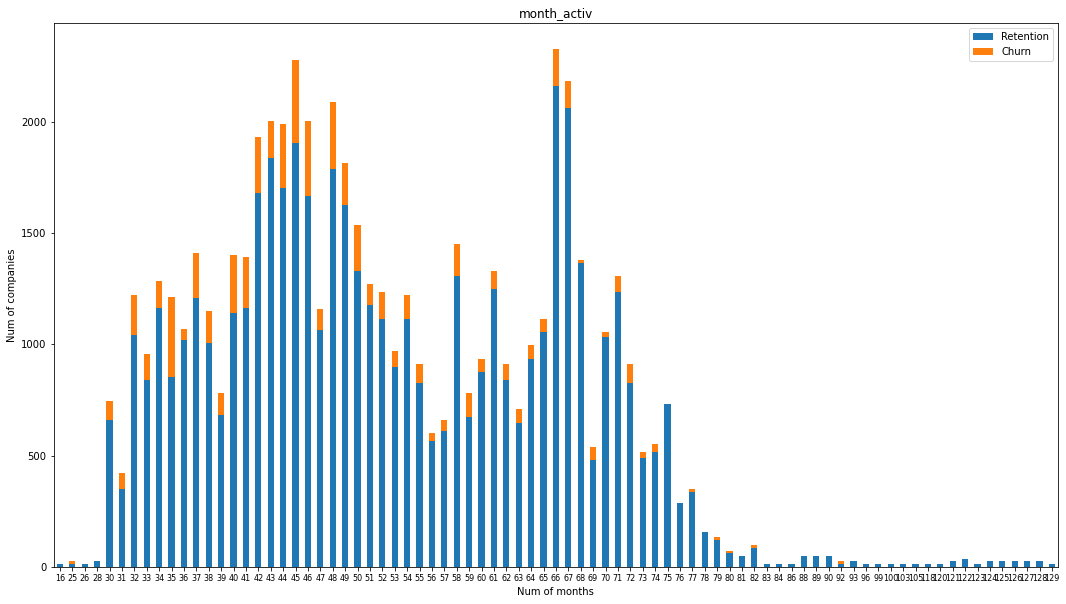

In [172]:
plot_churn_by_month(combine,"month_activ",8)

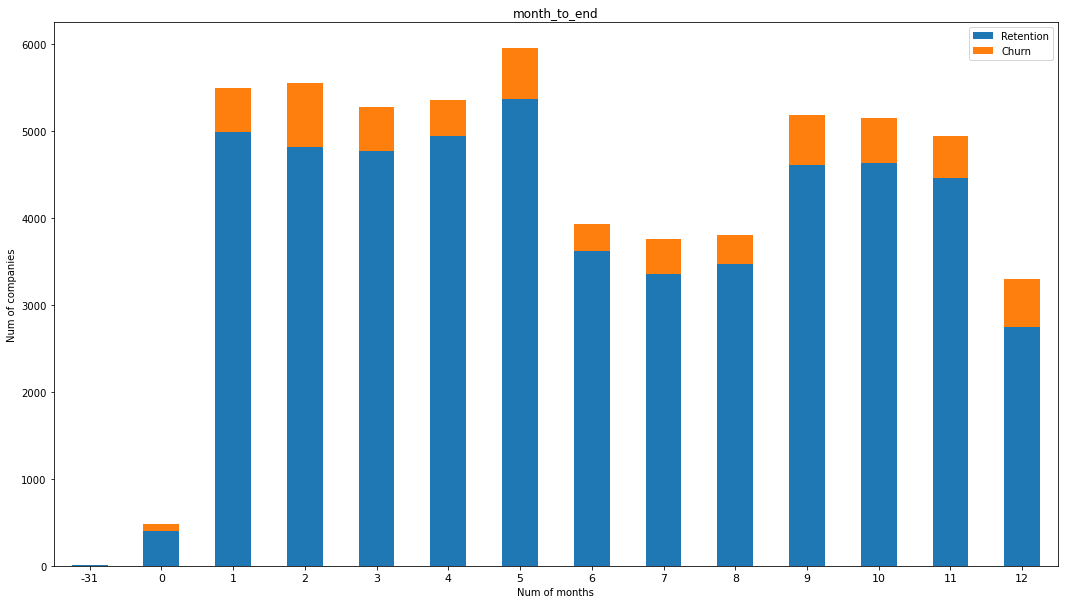

In [181]:
plot_churn_by_month(combine,"month_to_end")

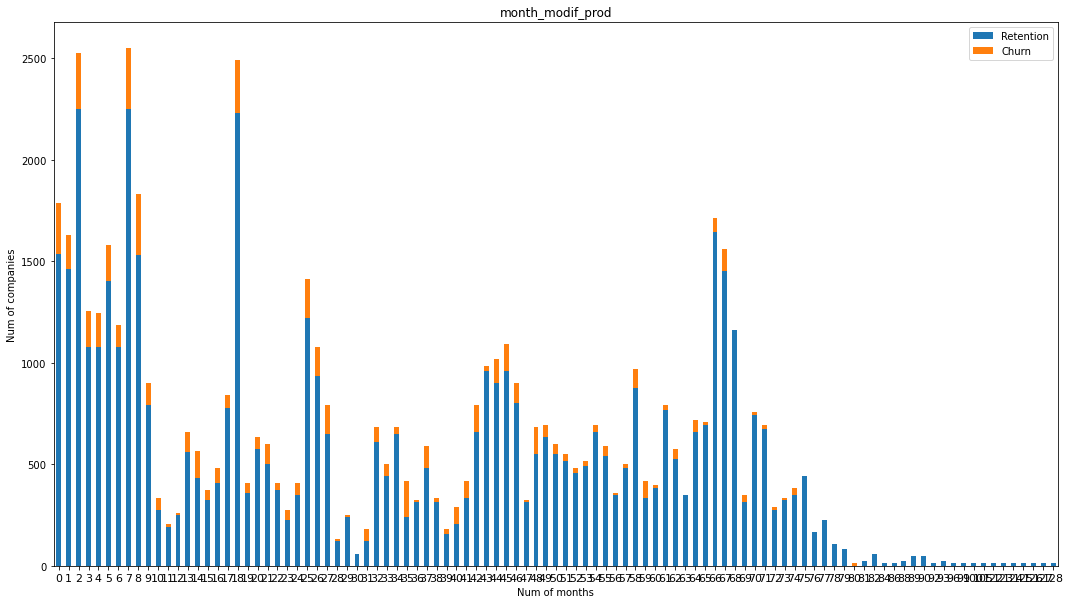

In [182]:
plot_churn_by_month(combine,"month_modif_prod")

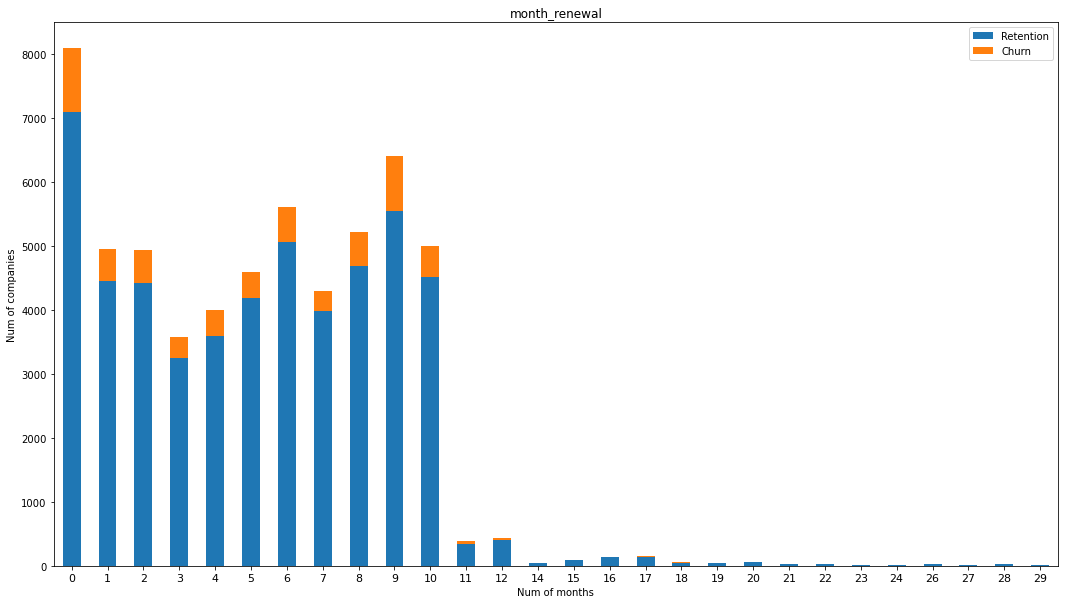

In [183]:
plot_churn_by_month(combine,"month_renewal")

In [184]:
# remove the original date columns
combine.drop(columns = ["date_activ","date_end","date_modif_prod","date_renewal"],inplace=True)

### Transforming Boolean data
- replace t to 1, f to 0 for has_gas column. (onehot encoding)

In [185]:
combine['has_gas'] = combine['has_gas'].replace(["t","f"],[1,0])

#### Categorical data and dummy variables
- need to encode categorical data to numerical data. 
    1. mapping each category to an integer (label encoding) but this will not work because the model will misunderstand the data to be in some kind of order or hierarchy, 0<1<2<3.... 所以dummy和onehot encoder比较好
    2. dummy variables
    3. onehot encoder

##### Channel_sales 

In [187]:
# fill Nan values with string "null_values"
combine["channel_sales"] = combine["channel_sales"].fillna("null_values")

In [189]:
# transform from object to categorical data type
combine['channel_sales'] = combine['channel_sales'].astype("category")

In [191]:
# check category, and number count for each category:
pd.DataFrame({"Category Count": combine["channel_sales"].value_counts()})

,Category Count
foosdfpfkusacimwkcsosbicdxkicaua,32775
lmkebamcaaclubfxadlmueccxoimlema,15497
usilxuppasemubllopkaafesmlibmsdf,6118
ewpakwlliwisiwduibdlfmalxowmwpci,3766
sddiedcslfslkckwlfkdpoeeailfpeds,24
epumfxlbckeskwekxbiuasklxalciiuu,12


In [192]:
# prefix --> channel_originalname, channel_originalname, channel_originalname.....
categories_channel = pd.get_dummies(combine['channel_sales'],prefix = "channel")
categories_channel.head()

,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [193]:
# since the column name are too long, rename columns for simplicity
categories_channel.columns=[col_name[:11]for col_name in categories_channel.columns]
categories_channel.head()

,channel_epu,channel_ewp,channel_foo,channel_lmk,channel_sdd,channel_usi
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


##### Origin_up column

In [195]:
print(combine["origin_up"].dtypes)
combine["origin_up"] = combine['origin_up'].astype("category")
print(combine["origin_up"].dtypes)

object
category


In [198]:
pd.DataFrame({"Value_counts":combine["origin_up"].value_counts()})

,Value_counts
lxidpiddsbxsbosboudacockeimpuepw,34415
kamkkxfxxuwbdslkwifmmcsiusiuosws,14984
ldkssxwpmemidmecebumciepifcamkci,8793


In [199]:
categories_origin = pd.get_dummies(combine["origin_up"],prefix = "origin")
categories_origin.columns=[col_name[:10] for col_name in categories_origin.columns]
categories_origin.head()

,origin_kam,origin_ldk,origin_lxi
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


##### activity_new 

In [209]:
combine['activity_new'].isna().sum()

0

In [210]:
df = pd.DataFrame({"count":combine['activity_new'].value_counts()})
df

,count
apdekpcbwosbxepsfxclislboipuxpop,15318
kkklcdamwfafdcfwofuscwfwadblfmce,3875
kwuslieomapmswolewpobpplkaooaaew,2162
fmwdwsxillemwbbwelxsampiuwwpcdcb,2136
ckfxocssowaeipxueikxcmaxdmcduxsa,1679
...,...
cficfwpcbaolwaelfwipemswsmobmkfm,12
aplsmkockmiifibukmmmomommebkdpfk,12
fexixikcmkbfdsexdlmaiswcdxbifsmm,12
opoiuuwdmxdssidluooopfswlkkkcsxf,12


In [214]:
print(f"num. of categories that are greater than 75: {df.loc[df['count']>75].count()}")
print(f"num. of categories that are smaller than 75: {df.loc[df['count']<=75].count()}")

num. of categories that are greater than 75: count    115
dtype: int64
num. of categories that are smaller than 75: count    270
dtype: int64


###### 
There are too many categories with very few number of samples. so we will replace any category less than 75 samples as null_value_categories

In [215]:
to_replace = list(df[df['count']<=75].index)
combine['activity_new'] = combine['activity_new'].replace(to_replace,"null_values_activitty")

In [216]:
categories_activity = pd.get_dummies(combine['activity_new'],prefix = "activity")
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]
categories_activity.head()

,activity_ace,activity_acp,activity_afe,activity_ako,activity_alk,activity_alm,activity_apd,activity_apm,activity_axe,activity_axs,...,activity_wdk,activity_wix,activity_wlx,activity_wxe,activity_xbs,activity_xcs,activity_xlp,activity_xlw,activity_xpm,activity_xww
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
categories_activity.drop(columns = ["activity_nul"], inplace=True)

In [220]:
combine.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,tenure,month_activ,month_to_end,month_modif_prod,month_renewal
count,5.819200e+04,5.819200e+04,5.819200e+04,58192.000000,58192.000000,58192.000000,58192.000000,58192.000000,58192.000000,58192.000000,...,58192.000000,58192.000000,58192.000000,58192.000000,58192.000000,58192.000000,58192.000000,58192.000000,58192.000000,58192.000000
mean,4.419132e+05,6.017739e+04,4.565087e+04,3446.451049,2965.689047,0.874759,89.005060,0.131766,0.065032,43.012635,...,0.040139,42.972179,13.733417,8.632310,0.103227,4.967844,52.500516,6.111630,33.141033,5.168408
std,1.023733e+06,2.496369e+05,1.302905e+05,5204.787257,6656.744200,4.809711,85.735979,0.022196,0.046264,3.773467,...,0.036636,3.659618,12.688930,7.987483,0.304258,1.180544,13.745332,3.528224,24.846660,3.760061
min,-3.319000e+03,-1.721000e+03,-6.202600e+04,-10070.520000,-9847.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.001410,16.000000,-31.000000,0.000000,0.000000
25%,1.375500e+04,0.000000e+00,5.520000e+02,914.590000,0.000000,0.000000,16.600000,0.115174,0.000000,40.606701,...,0.000000,40.728885,0.000000,0.000000,0.000000,4.000082,42.000000,3.000000,8.000000,2.000000
50%,4.771700e+04,0.000000e+00,3.600000e+03,1985.730000,1073.000000,0.000000,117.280000,0.118636,0.093746,41.105201,...,0.068829,41.063969,24.339578,16.226383,0.000000,5.002156,50.000000,6.000000,29.000000,5.000000
75%,3.036960e+05,0.000000e+00,2.741000e+04,4178.710000,3538.000000,0.000000,132.550000,0.145711,0.099545,44.311378,...,0.073487,44.266931,24.437330,16.291555,0.000000,6.001492,64.000000,9.000000,55.000000,8.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,155432.000000,50.000000,1052.390000,0.273963,0.168092,59.266378,...,0.114102,59.444710,36.490689,17.124888,1.000000,11.545754,129.000000,12.000000,128.000000,29.000000


In [221]:
combine = pd.merge(combine, categories_channel, left_index = True, right_index = True)
combine = pd.merge(combine, categories_origin, left_index = True, right_index = True)
combine = pd.merge(combine, categories_activity, left_index = True, right_index = True)

In [222]:
combine.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,activity_wdk,activity_wix,activity_wlx,activity_wxe,activity_xbs,activity_xcs,activity_xlp,activity_xlw,activity_xpm,activity_xww
0,48ada52261e7cf58715202705a0451c9,null_values_activitty,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.3,10025,0.0,359.29,...,0,0,0,0,0,0,0,0,0,0
1,48ada52261e7cf58715202705a0451c9,null_values_activitty,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.3,10025,0.0,359.29,...,0,0,0,0,0,0,0,0,0,0
2,48ada52261e7cf58715202705a0451c9,null_values_activitty,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.3,10025,0.0,359.29,...,0,0,0,0,0,0,0,0,0,0
3,48ada52261e7cf58715202705a0451c9,null_values_activitty,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.3,10025,0.0,359.29,...,0,0,0,0,0,0,0,0,0,0
4,48ada52261e7cf58715202705a0451c9,null_values_activitty,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.3,10025,0.0,359.29,...,0,0,0,0,0,0,0,0,0,0


In [223]:
combine.drop(columns = ["channel_sales", "origin_up", "activity_new"],inplace=True)
combine.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,activity_wdk,activity_wix,activity_wlx,activity_wxe,activity_xbs,activity_xcs,activity_xlp,activity_xlw,activity_xpm,activity_xww
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.3,10025,0.0,359.29,0.095919,0.088347,...,0,0,0,0,0,0,0,0,0,0
1,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.3,10025,0.0,359.29,0.095919,0.088347,...,0,0,0,0,0,0,0,0,0,0
2,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.3,10025,0.0,359.29,0.095919,0.088347,...,0,0,0,0,0,0,0,0,0,0
3,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.3,10025,0.0,359.29,0.095919,0.088347,...,0,0,0,0,0,0,0,0,0,0
4,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.3,10025,0.0,359.29,0.095919,0.088347,...,0,0,0,0,0,0,0,0,0,0
